In [424]:
# OS
import sys
import os

# WARNINGS
import warnings
warnings.filterwarnings('ignore')

# NUMPY
import numpy as np

import scipy

# STATS
import scipy.stats as stats
from scipy.stats import norm, skew

# MATPLOTLIB
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline 
# plt.style.use('fivethirtyeight') 

params = {'axes.labelsize': 8, # 12
          'font.size': 8, # 12
          'legend.fontsize': 8, # 12
          'xtick.labelsize': 8, # 10
          'ytick.labelsize': 8, # 10
          'text.usetex': False,
          'figure.figsize': (10, 8)}
plt.rcParams.update(params)


# PANDAS
import pandas as pd 
pd.set_option("display.max_rows", None, "display.max_columns", None) 

# SEABORN 
import seaborn as sns
# sns.set_context("poster")
# sns.set_style("ticks")

# SCIKIT-LEARN: SELECTION DE VARIABLES
# Vérifiez les versions
import sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# SCHIKIT-LEARN: PRE-PROCESSING
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # Encodage des variables catégorielles ordinales
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder # Encodage des variables catégorielles nominales
from sklearn.preprocessing import StandardScaler # Standardisation des variables numériques
from sklearn.preprocessing import MinMaxScaler # Normalisation MinMax
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer # Imputation
from sklearn.impute import KNNImputer 


# SCHIKIT-LEARN: MODELES
from sklearn import linear_model # Classe Modèle linéaire 
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso 
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR 
from sklearn.neighbors import KNeighborsRegressor

# SCHIKIT-LEARN: VALIDATION CROISEE + OPTIMISATION
from sklearn.model_selection import train_test_split # 
from sklearn.model_selection import cross_val_score # Validation croisée pour comparaison entre modèles
from sklearn.model_selection import validation_curve # Courbe de validation: visualiser les scores lors du choix d'un hyperparamétre
from sklearn.model_selection import GridSearchCV # Tester plusieurs hyperparamètres
from sklearn.model_selection import learning_curve # Courbe d'apprentissage: visualisation des scores du train et du validation sets en fonction des quantités des données
 
## EVALUATION

from sklearn.metrics import r2_score # Coefficient R2
from sklearn.metrics import mean_absolute_error #  MAE
from sklearn.metrics import mean_squared_error  # RMSE
from sklearn.metrics import median_absolute_error # Erreur de la médiane absolue

# SCHIKIT-LEARN: PIPELINE AND TRANSFORMATEUR
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

In [425]:

df_fisc = pd.read_excel("data.xls", header = 1)

# 1 - Analyse exploratoire des données
## 1.1 - Affichage des données principales du dataset

In [427]:
df_fisc.head(20)

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0    1      20000    2          2         1   24      2      2     -1     -1   
1    2     120000    2          2         2   26     -1      2      0      0   
2    3      90000    2          2         2   34      0      0      0      0   
3    4      50000    2          2         1   37      0      0      0      0   
4    5      50000    1          2         1   57     -1      0     -1      0   
5    6      50000    1          1         2   37      0      0      0      0   
6    7     500000    1          1         2   29      0      0      0      0   
7    8     100000    2          2         2   23      0     -1     -1      0   
8    9     140000    2          3         1   28      0      0      2      0   
9   10      20000    1          3         2   35     -2     -2     -2     -2   
10  11     200000    2          3         2   34      0      0      2      0   
11  12     260000    2          1         2   51     -1     -1     -1     -1   
12  13     630000    2          2         2   41     -1      0     -1     -1   
13  14      70000    1          2         2   30      1      2      2      0   
14  15     250000    1          1         2   29      0      0      0      0   
15  16      50000    2          3         3   23      1      2      0      0   
16  17      20000    1          1         2   24      0      0      2      2   
17  18     320000    1          1         1   49      0      0      0     -1   
18  19     360000    2          1         1   49      1     -2     -2     -2   
19  20     180000    2          1         2   29      1     -2     -2     -2   

    PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0      -2     -2       3913       3102        689          0          0   
1       0      2       2682       1725       2682       3272       3455   
2       0      0      29239      14027      13559      14331      14948   
3       0      0      46990      48233      49291      28314      28959   
4       0      0       8617       5670      35835      20940      19146   
5       0      0      64400      57069      57608      19394      19619   
6       0      0     367965     412023     445007     542653     483003   
7       0     -1      11876        380        601        221       -159   
8       0      0      11285      14096      12108      12211      11793   
9      -1     -1          0          0          0          0      13007   
10      0     -1      11073       9787       5535       2513       1828   
11     -1      2      12261      21670       9966       8517      22287   
12     -1     -1      12137       6500       6500       6500       6500   
13      0      2      65802      67369      65701      66782      36137   
14      0      0      70887      67060      63561      59696      56875   
15      0      0      50614      29173      28116      28771      29531   
16      2      2      15376      18010      17428      18338      17905   
17     -1     -1     253286     246536     194663      70074       5856   
18     -2     -2          0          0          0          0          0   
19     -2     -2          0          0          0          0          0   

    BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0           0         0       689         0         0         0         0   
1        3261         0      1000      1000      1000         0      2000   
2       15549      1518      1500      1000      1000      1000      5000   
3       29547      2000      2019      1200      1100      1069      1000   
4       19131      2000     36681     10000      9000       689       679   
5       20024      2500      1815       657      1000      1000       800   
6      473944     55000     40000     38000     20239     13750     13770   
7         567       380       601         0       581      1687      1542   
8        3719      3329         0       432      1000 

In [428]:
df_fisc.shape # Dimmensions

(30000, 25)

In [429]:
df_fisc.info() # Information sur colonnes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [430]:
df_fisc.columns # Les colonnes

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [431]:
df_fisc.sum() # Nombre de valeurs nul par colonne

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [432]:
cible = df_fisc['default payment next month'].unique() # Valeurs possible pour la variable cible
print(cible)

[1 0]


### Visualisation de la distribution de la variable cible

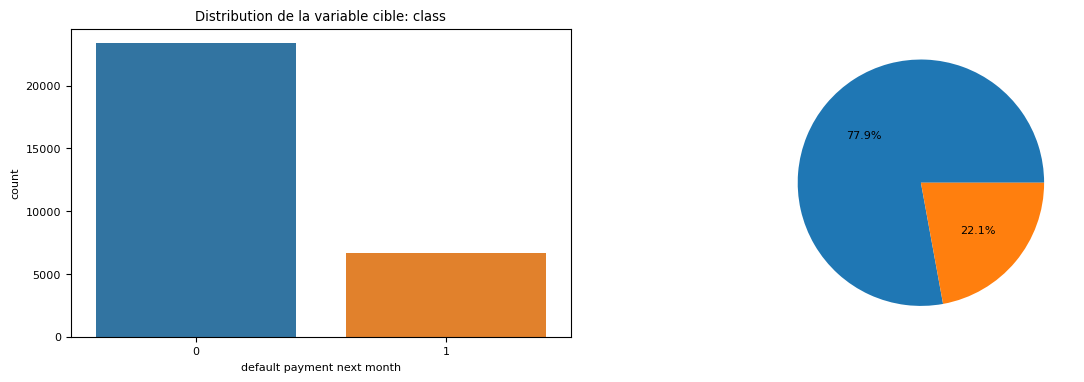

In [433]:
plt.figure(figsize=(8, 4))
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x='default payment next month', data=df_fisc)
plt.title("Distribution de la variable cible: class")
plt.subplot(122)
plt.pie(df_fisc['default payment next month'].value_counts(), autopct='%1.1f%%')
plt.show()

On remarque qu'il y a 22% des personnes qui ont ont eu un défaut de paiement, soit presque un quart de l'échantillon. Cela nous montre que les données cibles sont déséquilibrées.

## 1.2 Analyse bivariée
### Matrice de corrélation entre les variables

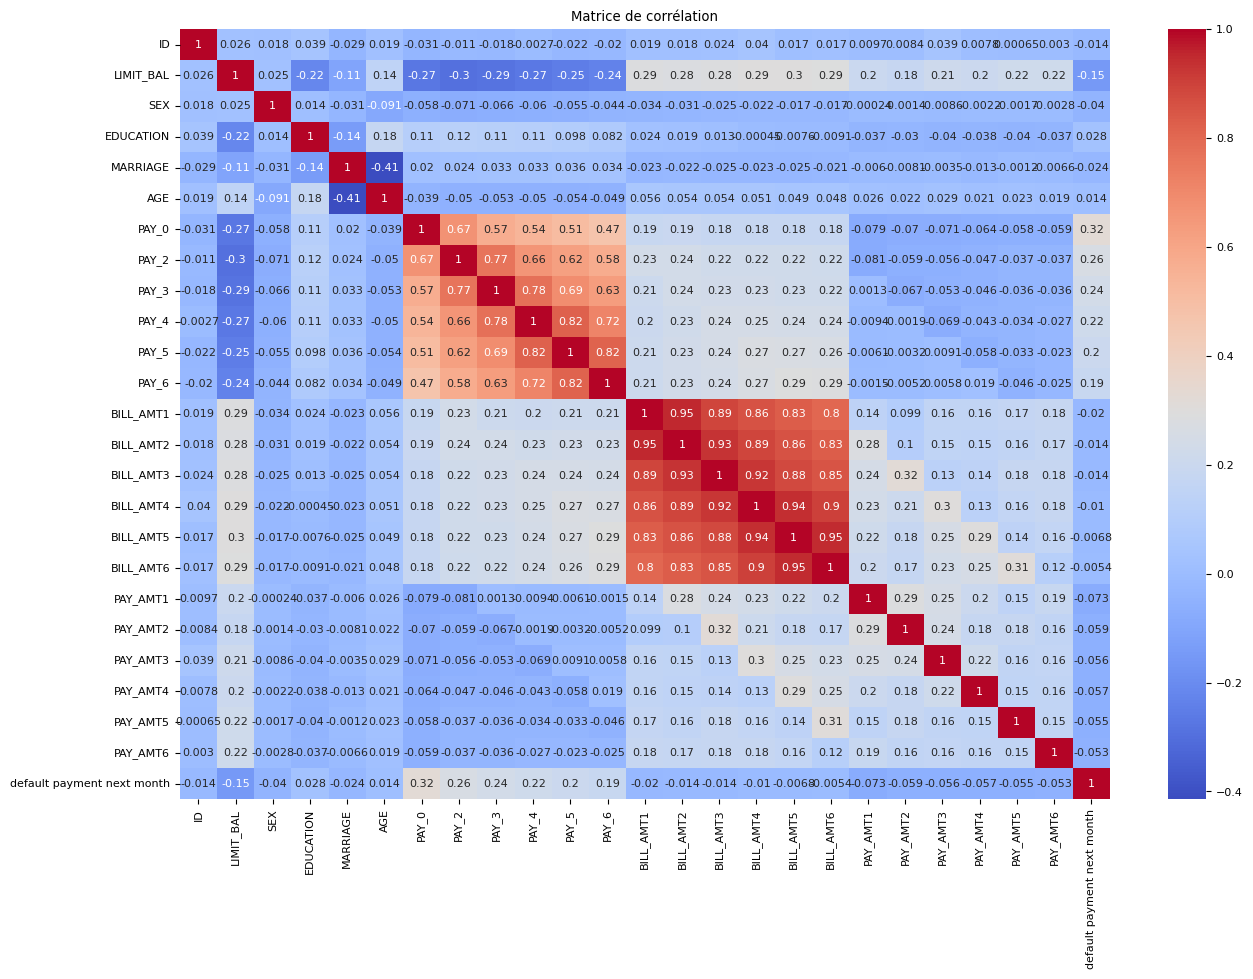

In [434]:
# Matrice de corrélation pour les variables numériques
corr = df_fisc.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()

On voit une forte correlation entre les status de remboursement (PAY_X) mais égaleent entre les factures des différents mois (BILL_AMTX).

### Matrice de corrélation entre la variable cible et le reste des variables

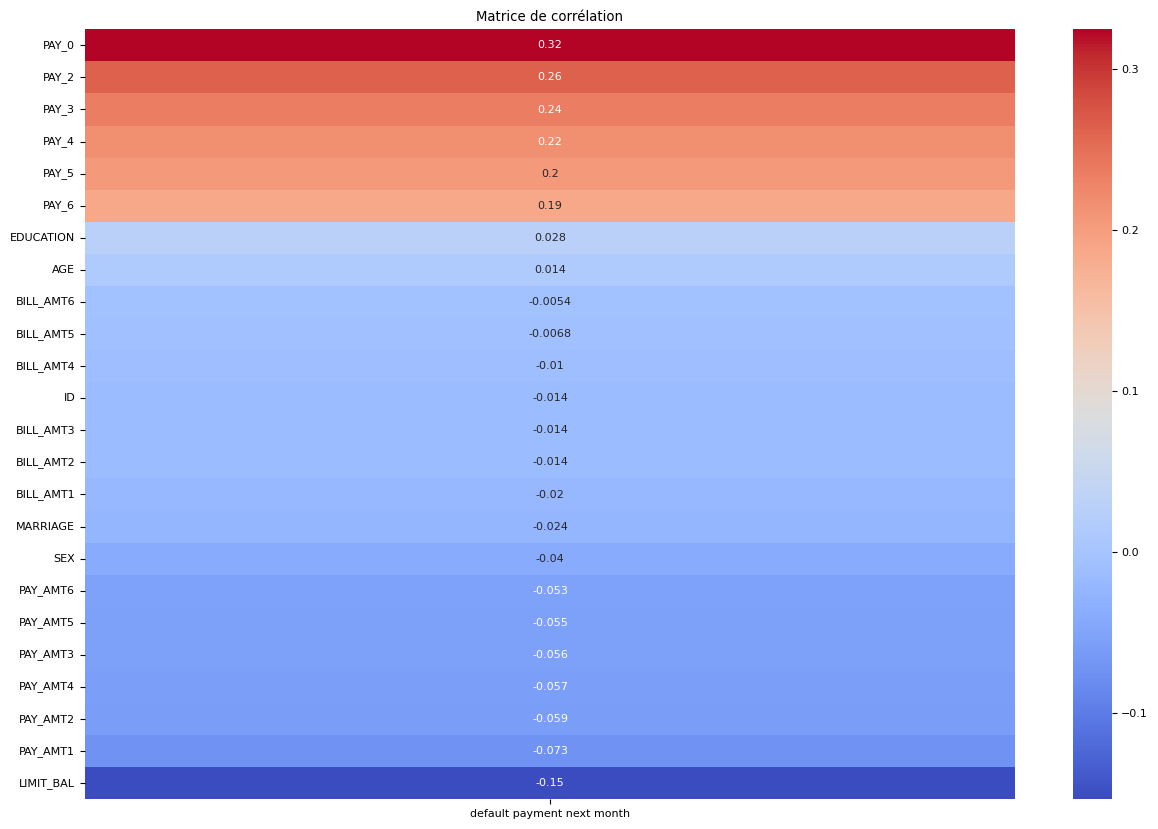

In [435]:
corr2 = df_fisc.corr()[['default payment next month']]
corr2 = corr2.sort_values('default payment next month', ascending=False)
corr2 = corr2.drop('default payment next month')

plt.figure(figsize=(15, 10))
sns.heatmap(corr2, annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()

On voit une très forte corrélation entre les variables PAY_X, correspondant au status de paiement des derniers mois.

### Distribution de la variable cible en fonction de variables numérique

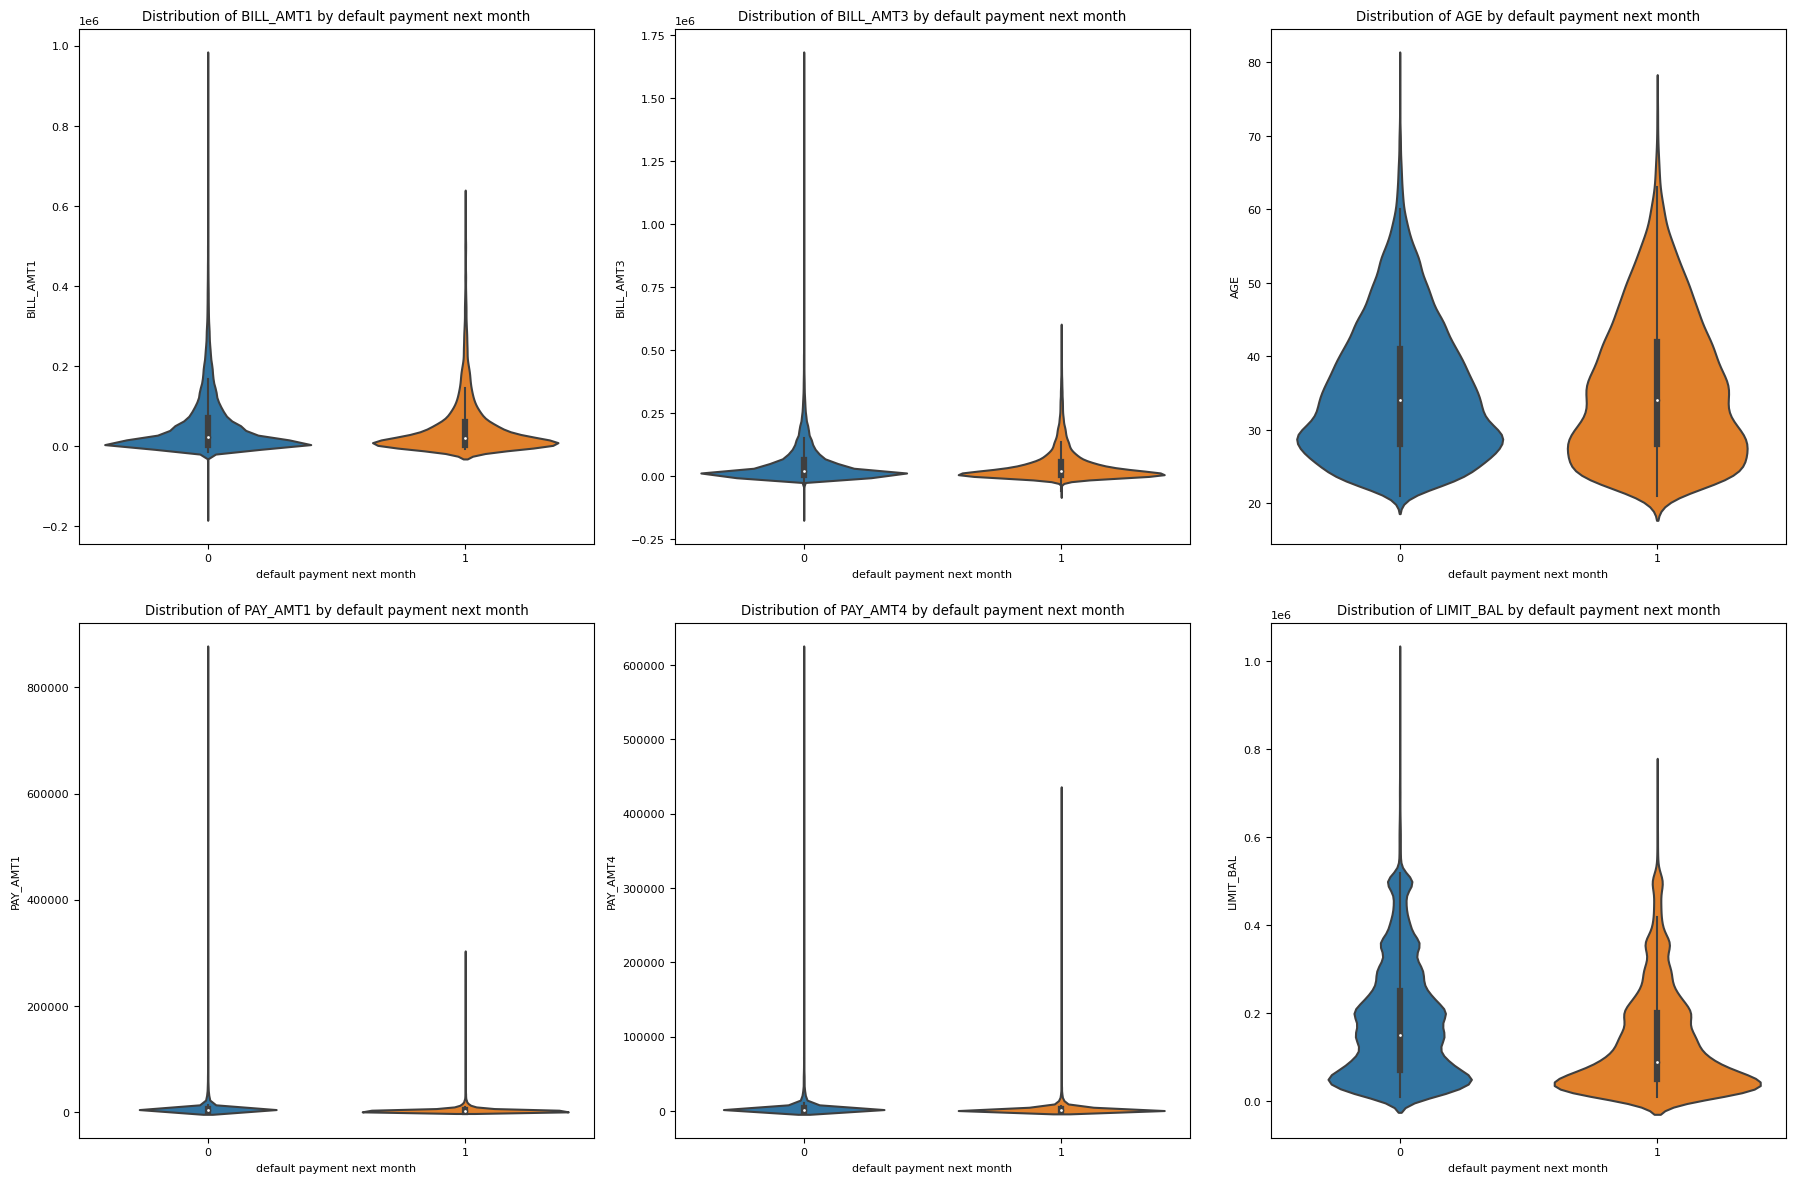

In [436]:
var = ['BILL_AMT1', 'BILL_AMT3', 'AGE','PAY_AMT1', 'PAY_AMT4', 'LIMIT_BAL']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i, v in enumerate(var):
    row = i // 3
    col = i % 3
    sns.violinplot(x='default payment next month', y=v, data=df_fisc, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {v} by default payment next month')

plt.tight_layout()
plt.show()

### Distribution de la variable cible en fonction de variables catégorielle

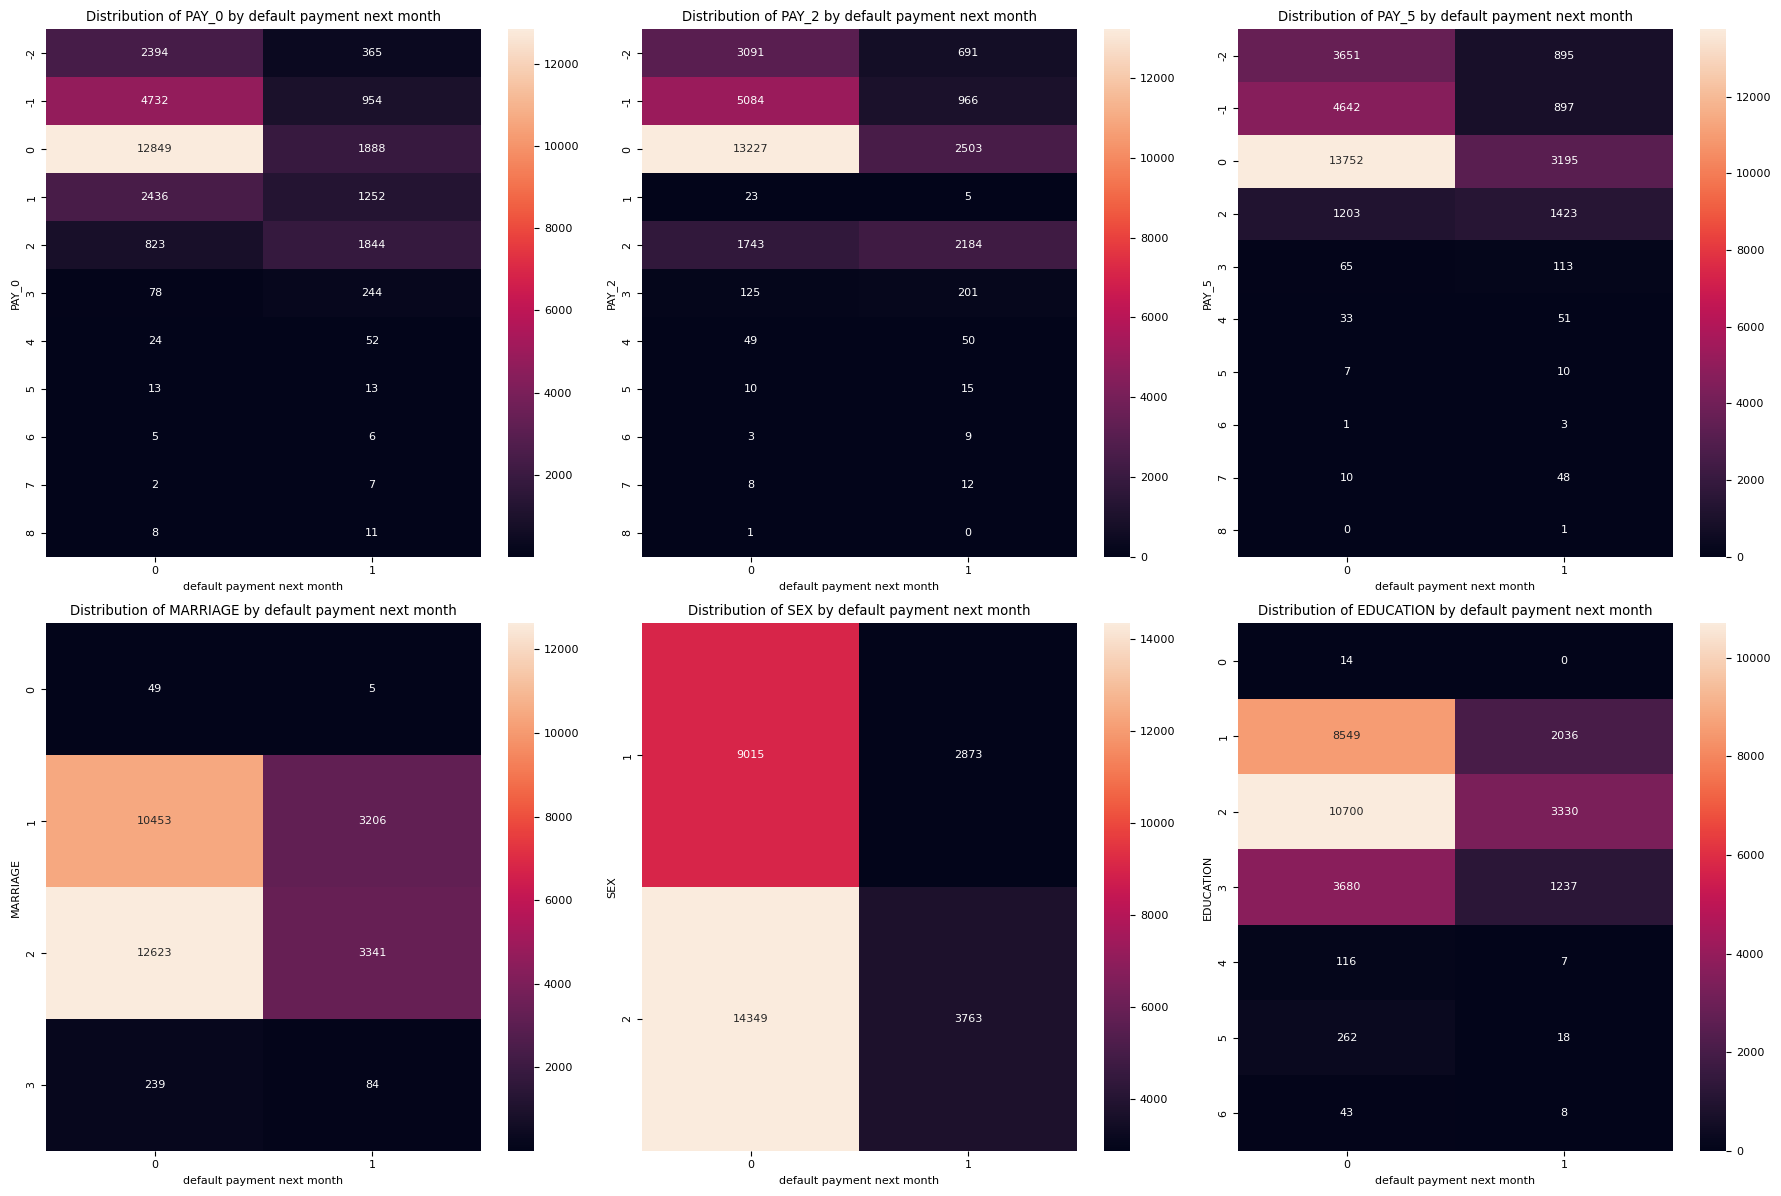

In [437]:
var = ["PAY_0","PAY_2", "PAY_5",  "MARRIAGE", "SEX","EDUCATION"]

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i, v in enumerate(var):
    row = i // 3
    col = i % 3
    sns.heatmap(pd.crosstab(df_fisc[v], df_fisc['default payment next month']), annot=True, fmt='d', ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {v} by default payment next month')

plt.tight_layout()
plt.show()

# Pré-traitement des données
### Visualisation des valeurs manquantes

Il n'y a pas de valeur manquantes comme décris dans le dataset.

In [439]:
cont_features = df_fisc.drop(columns = ['ID', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']).select_dtypes('int64').columns
cont_features

Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month'],
      dtype='object')

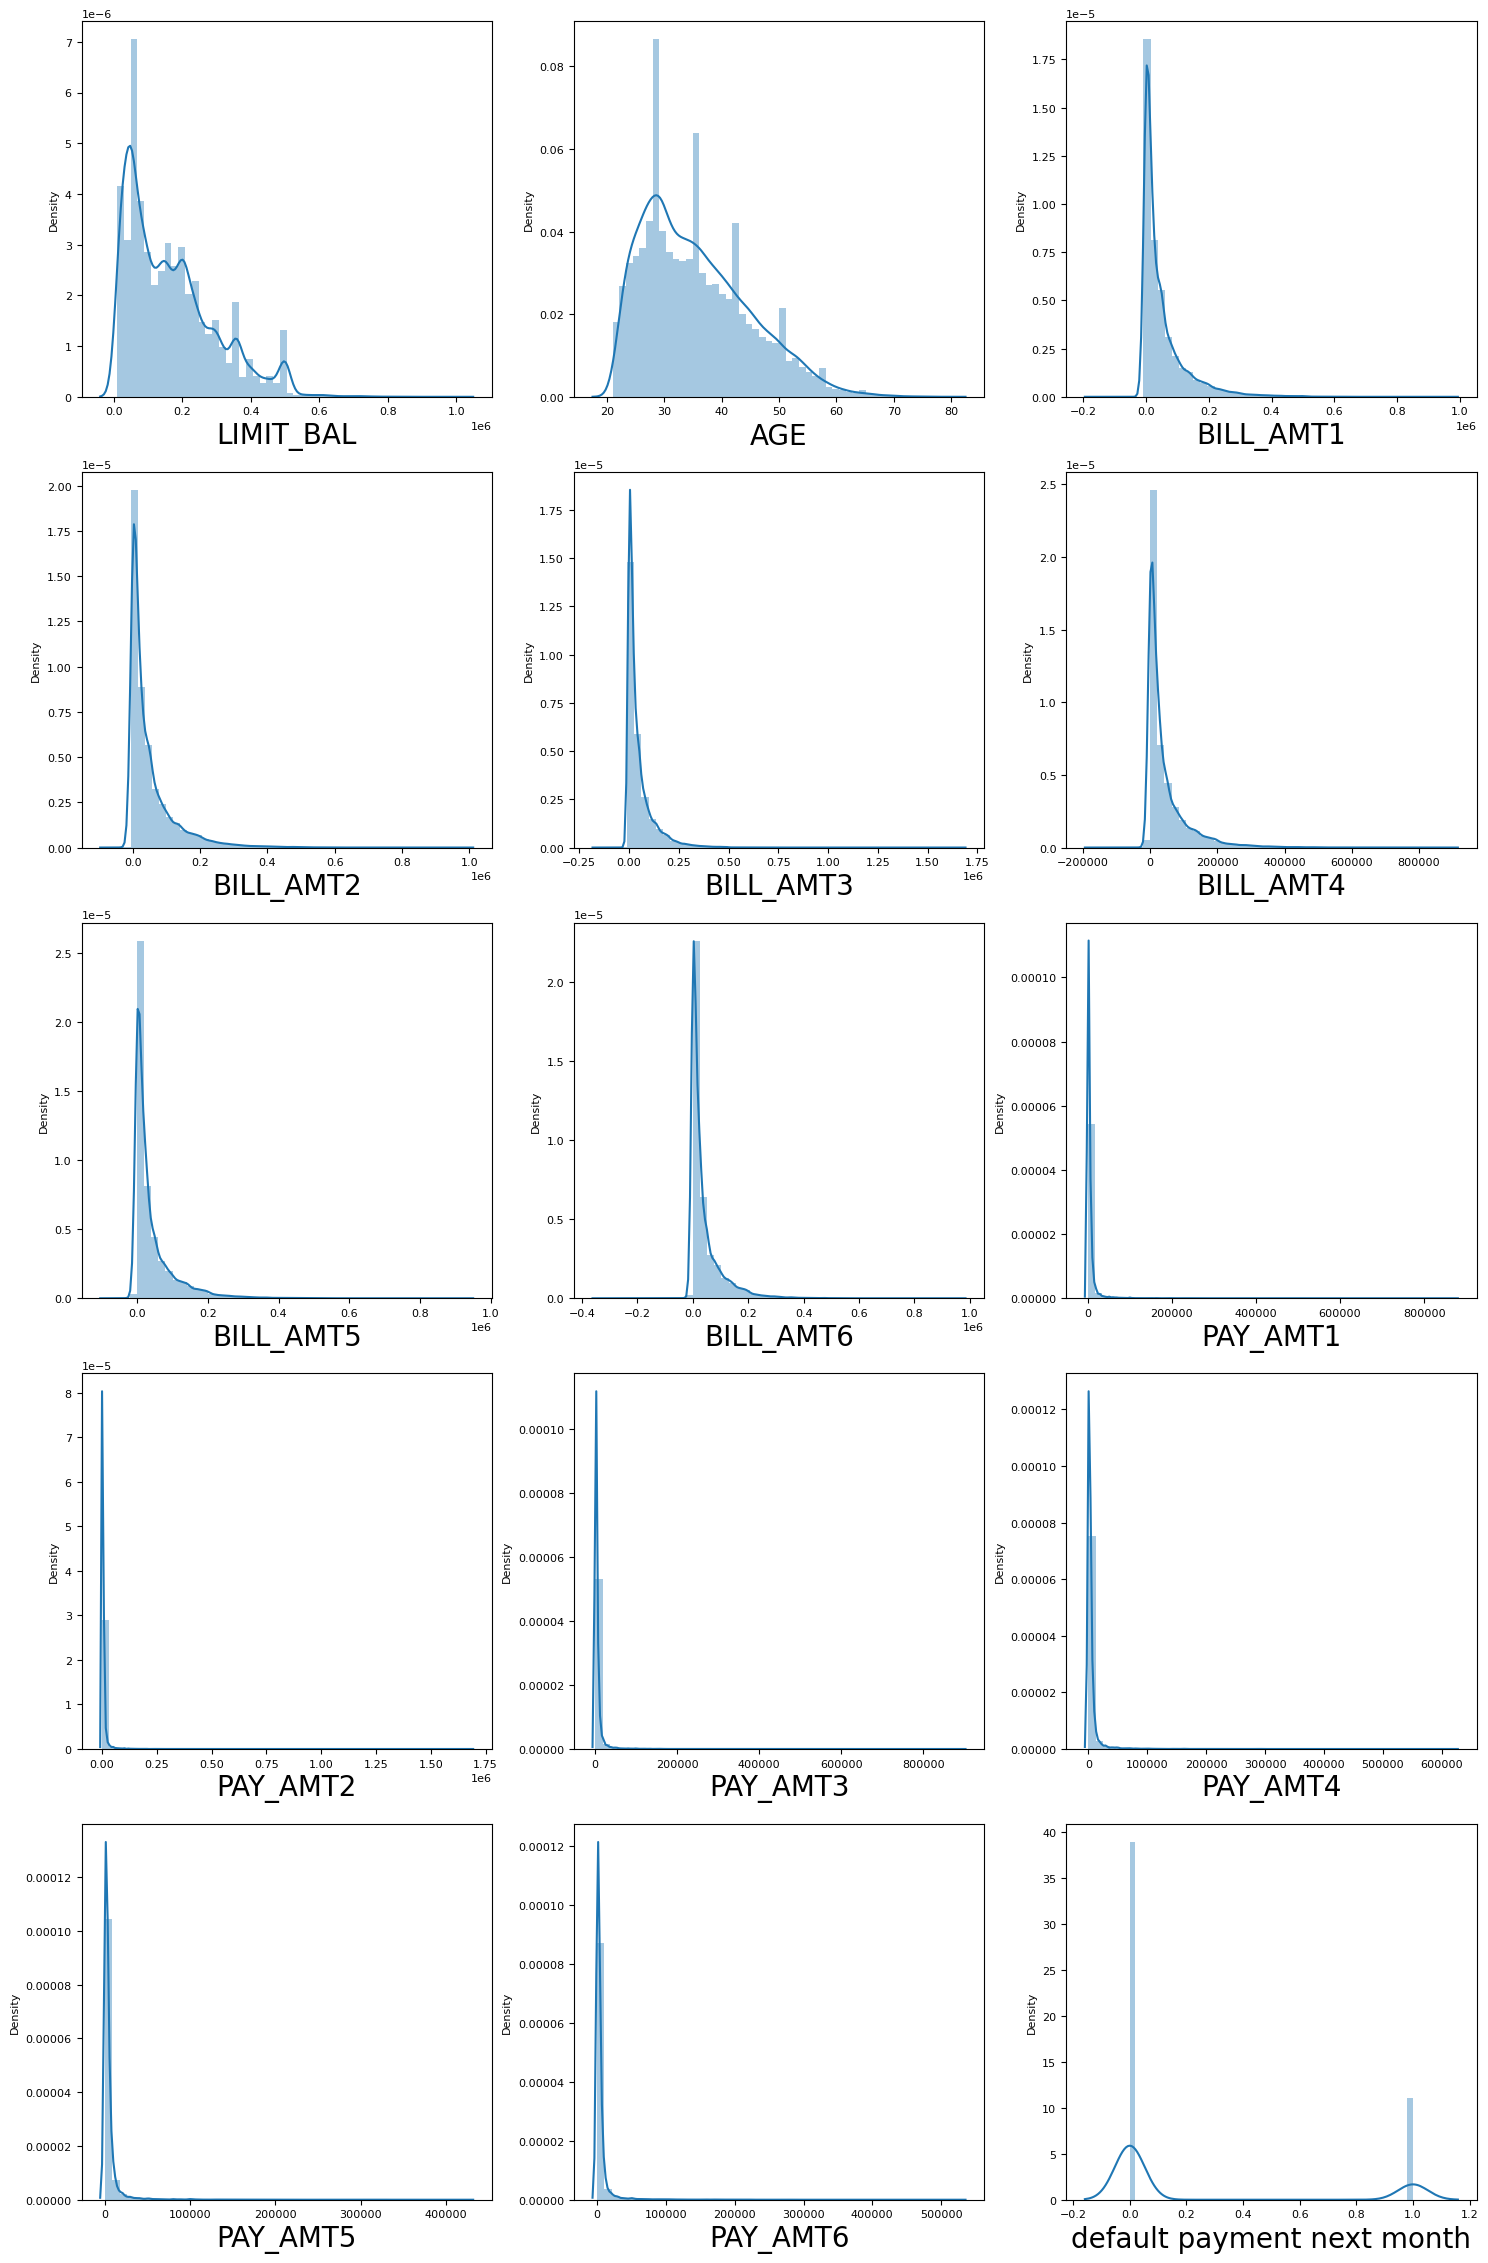

In [440]:
plt.figure(figsize=(18,40))
for i, feature in enumerate(cont_features):
        ax = plt.subplot(7,3,i+1)
        sns.distplot(df_fisc[feature])
        plt.xlabel(feature,fontsize = 20)

plt.show()

In [441]:
df_fisc.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [442]:
cat_features = df_fisc.drop(columns =['ID','LIMIT_BAL','AGE', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
                                       'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6',]).select_dtypes('int64').columns
cat_features

Index(['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6', 'default payment next month'],
      dtype='object')

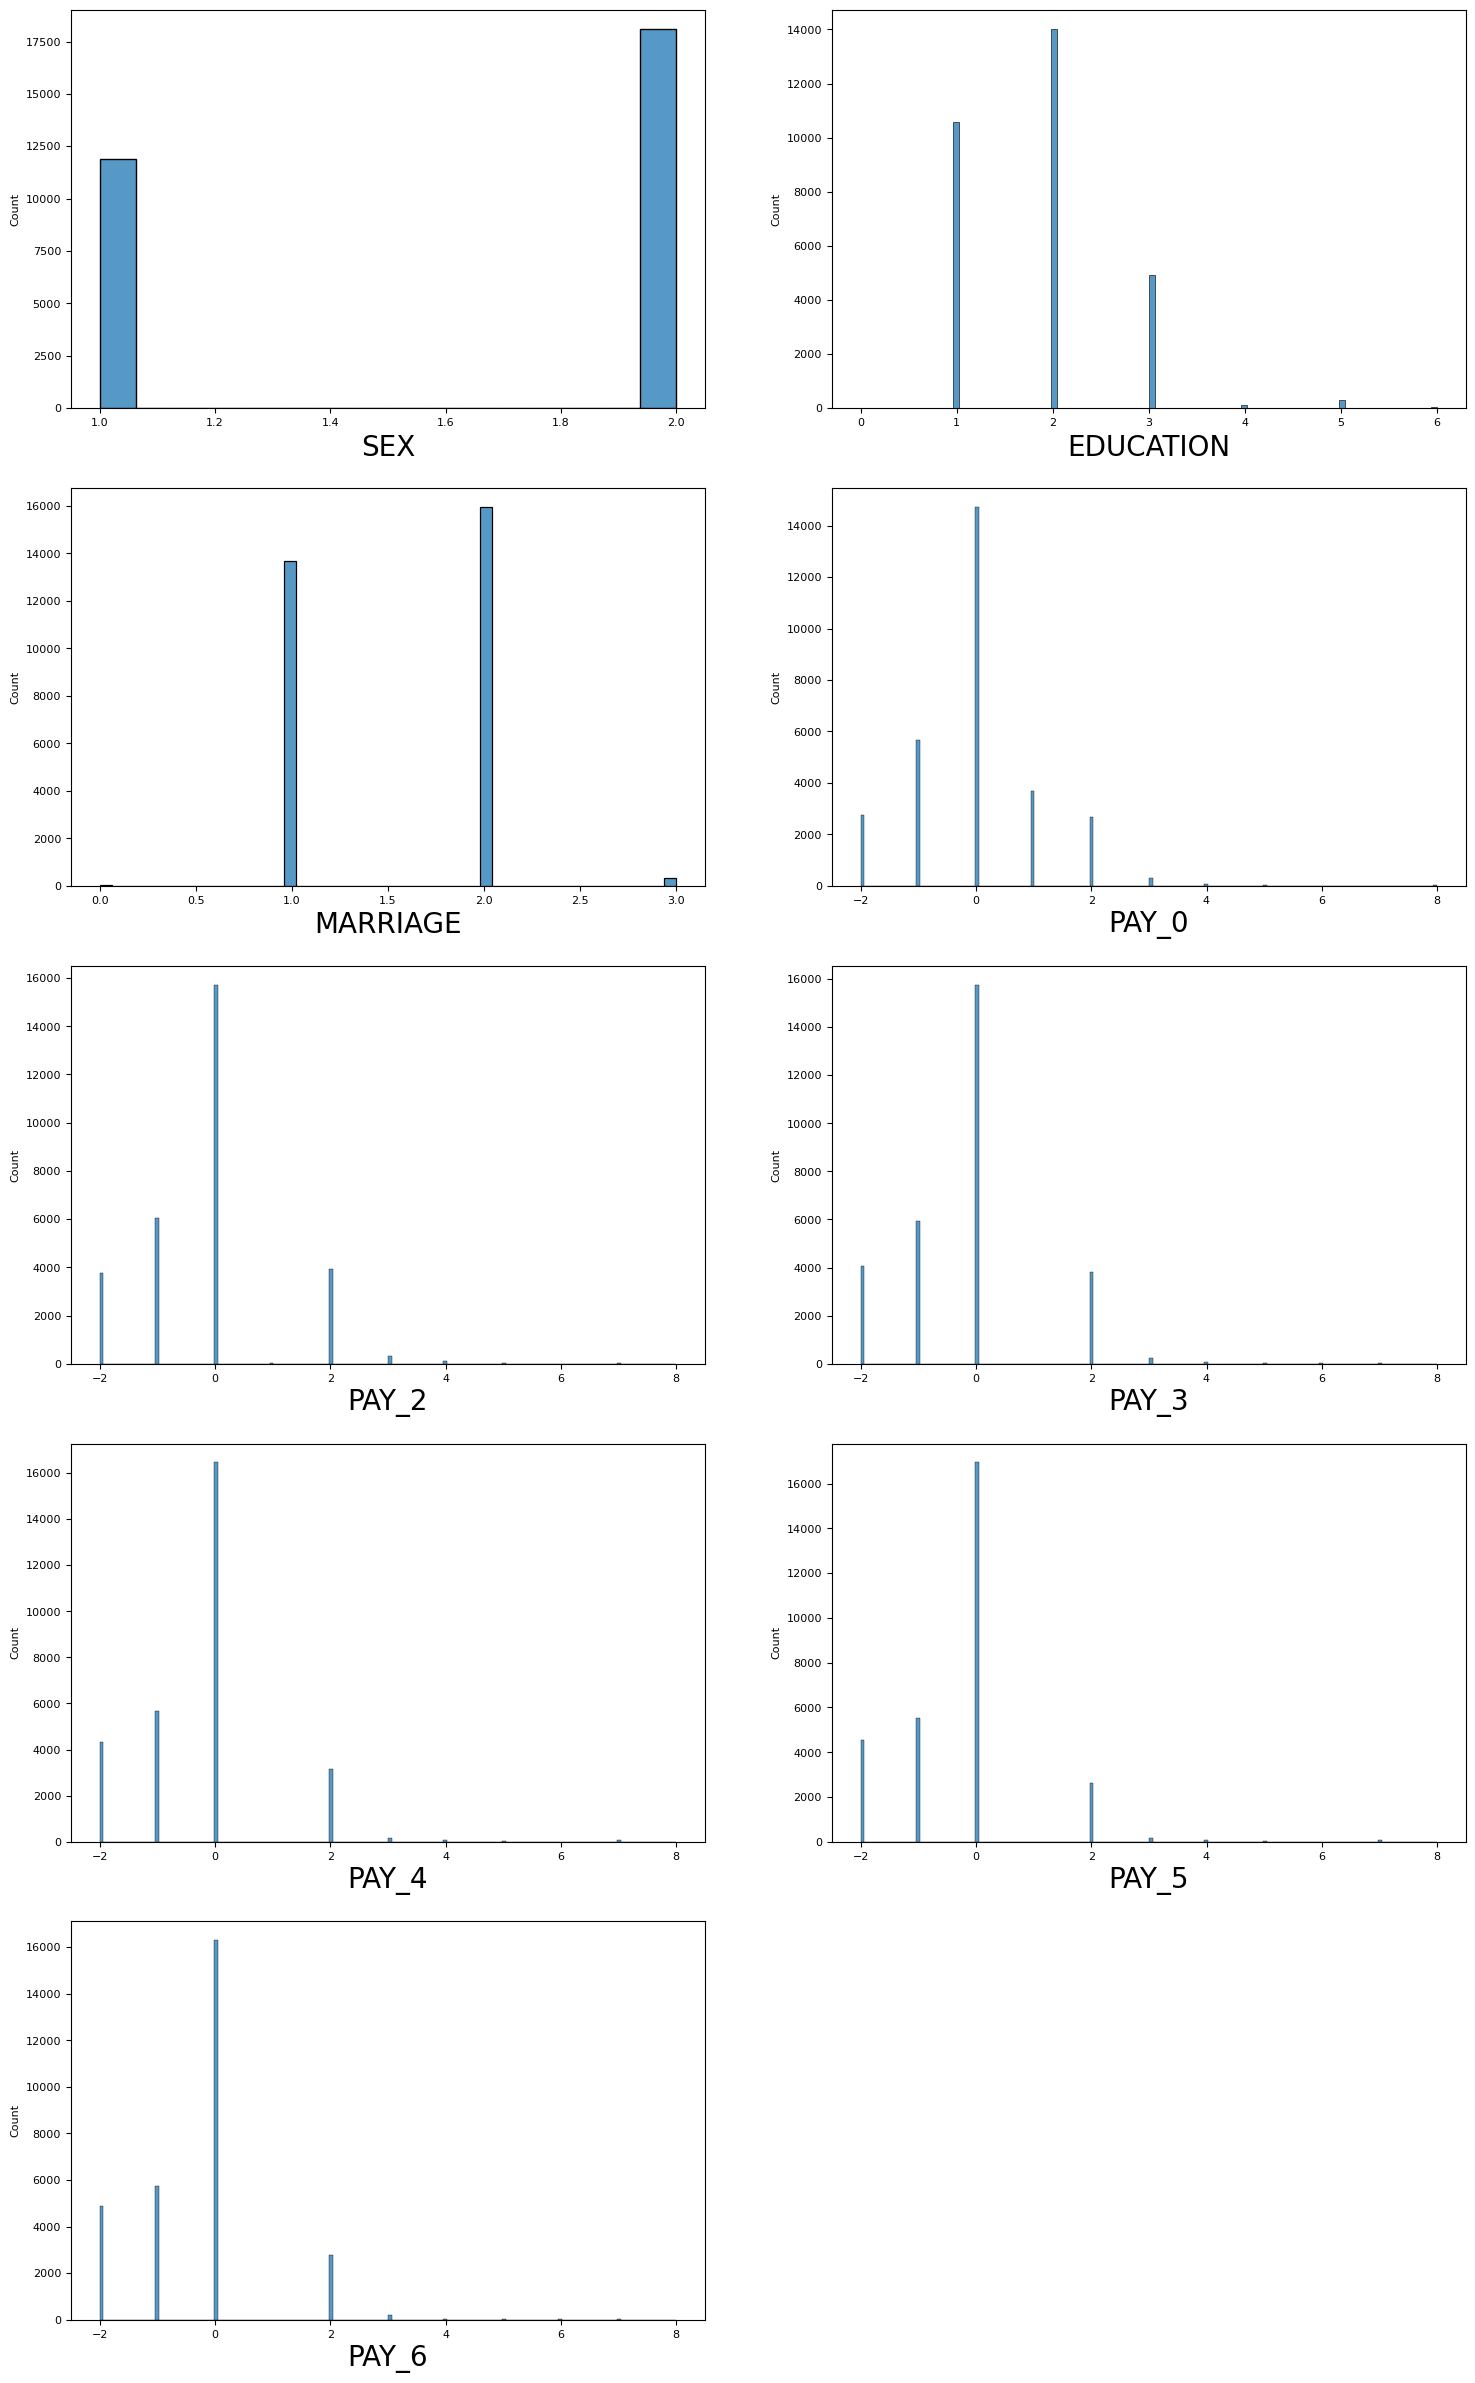

In [443]:
plt.figure(figsize=(18,30))
for i, feature in enumerate(cat_features):
    if i <= 8:
        ax = plt.subplot(5,2,i+1)
        sns.histplot(df_fisc[feature])
        plt.xlabel(feature,fontsize = 20)
plt.show()

<Figure size 1800x1800 with 0 Axes>

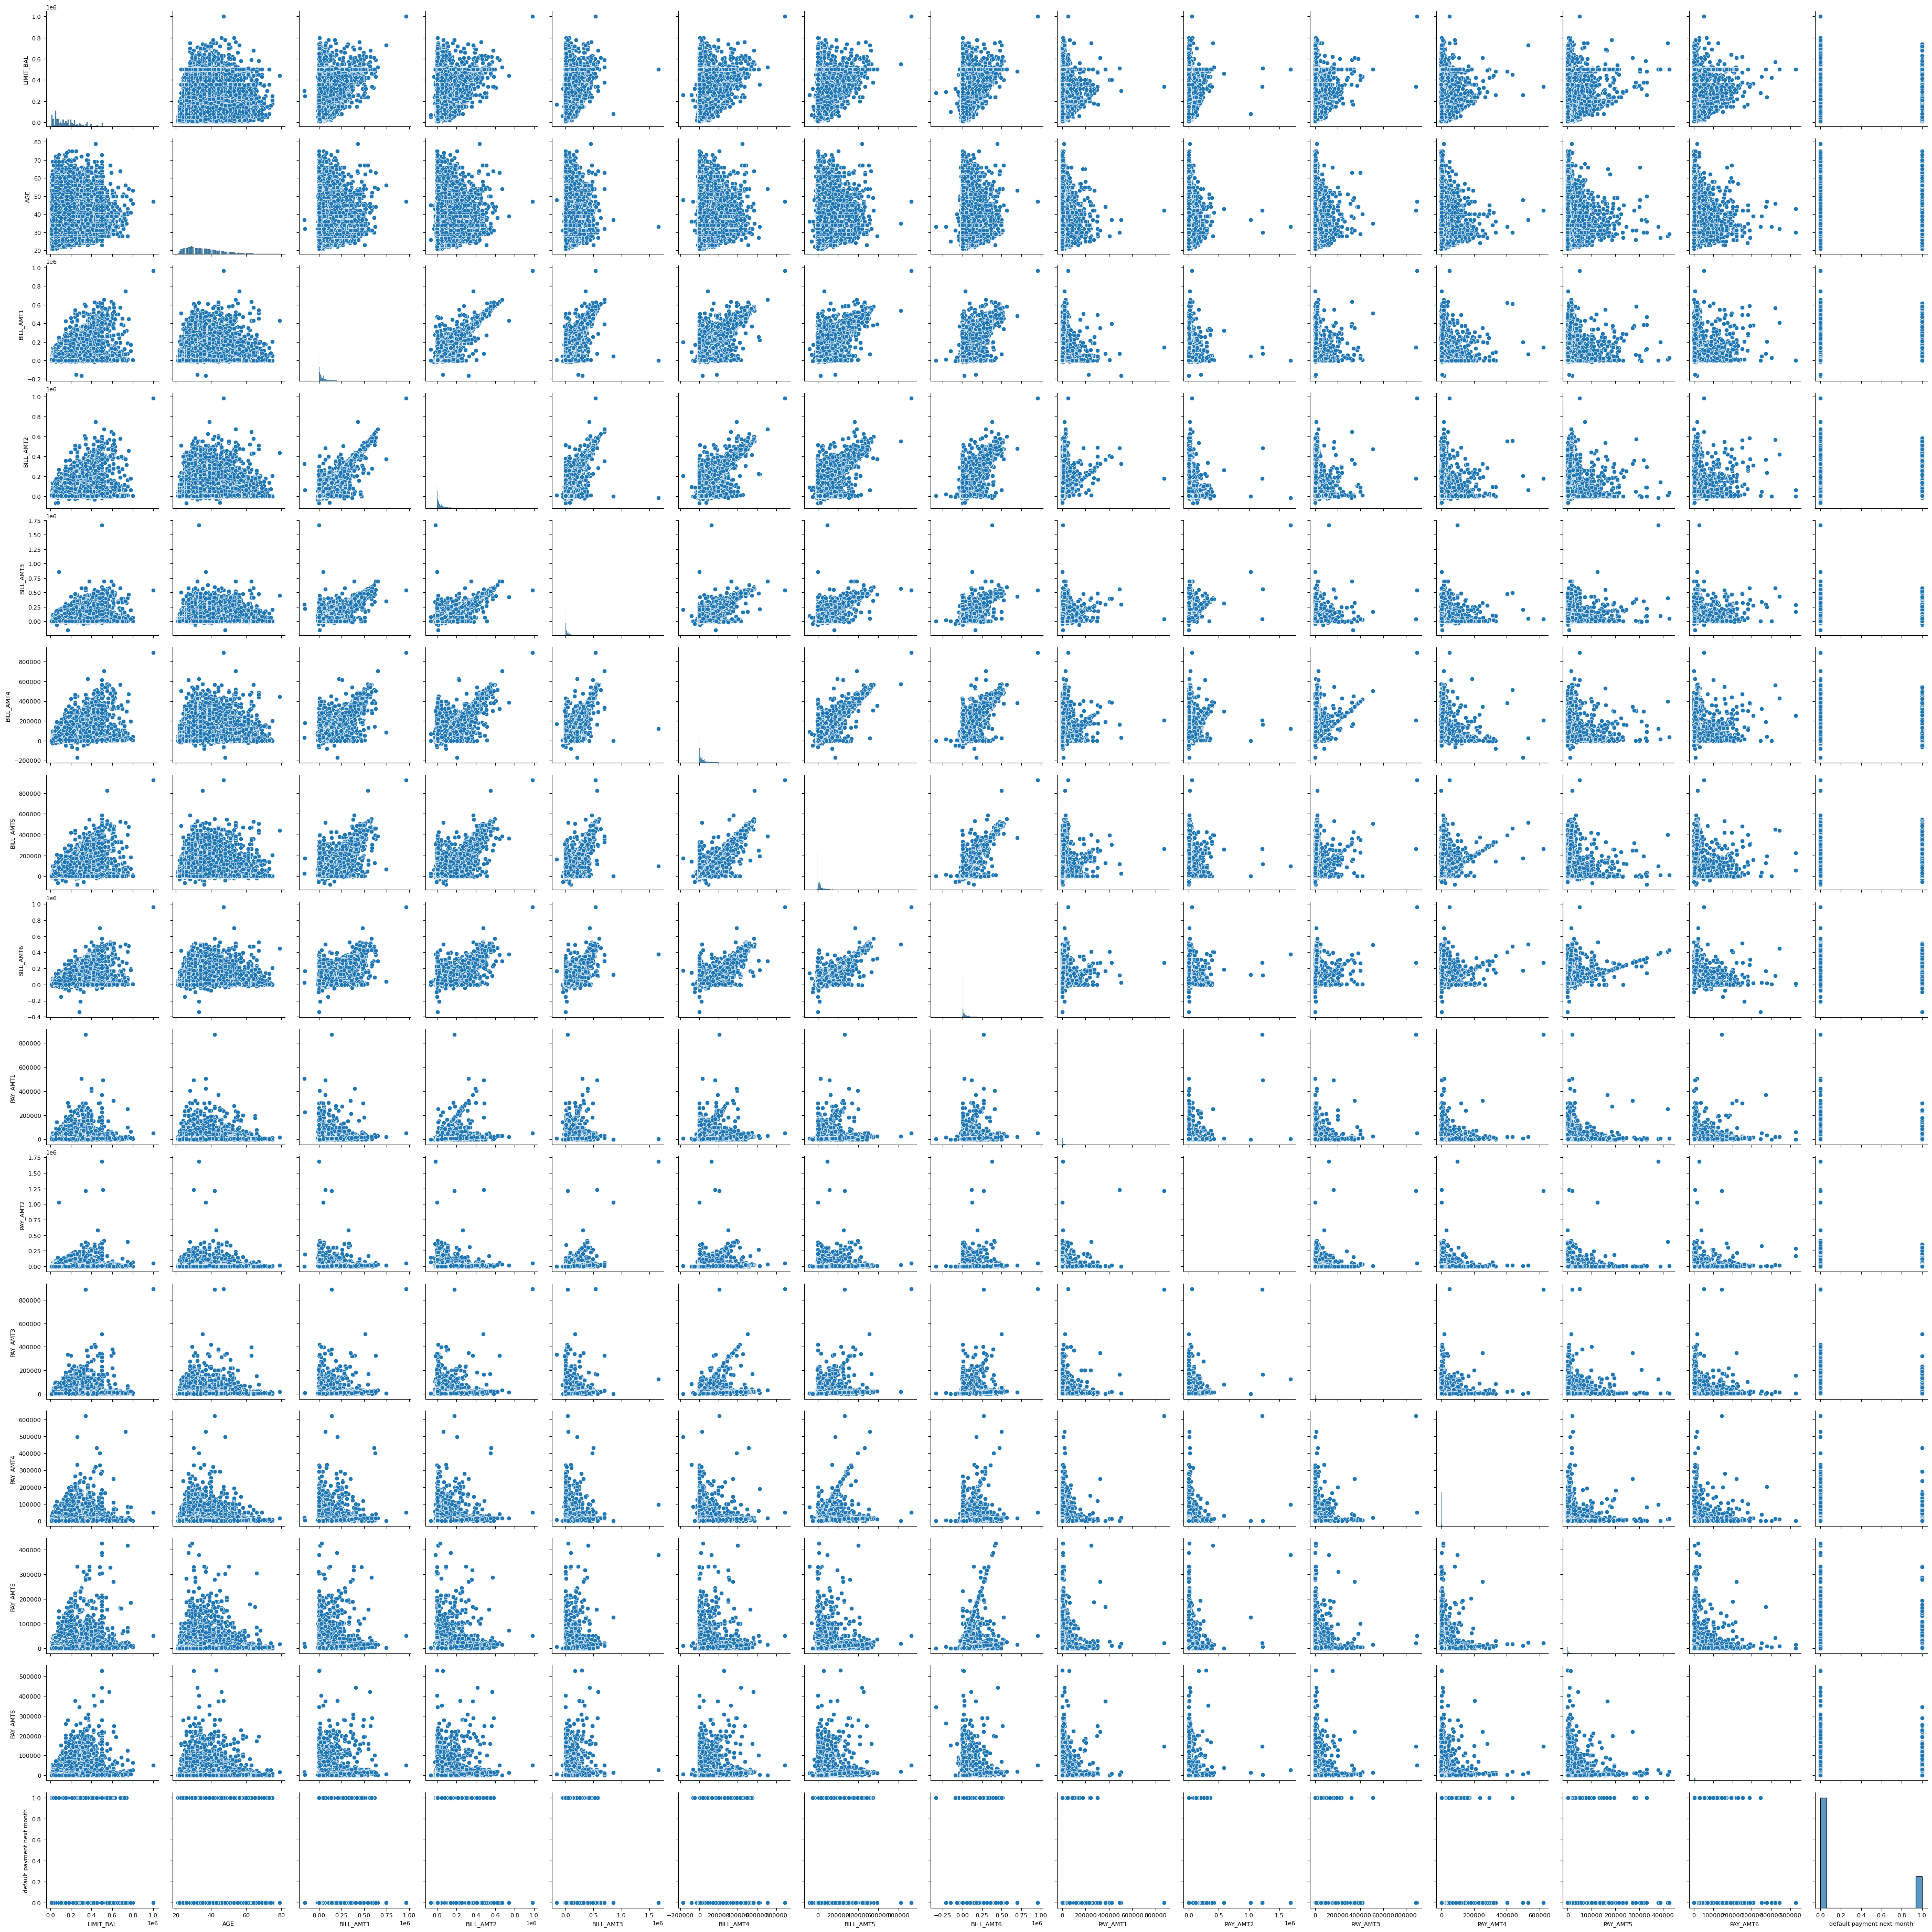

In [444]:
plt.figure(figsize=(18,18))
sns.pairplot(df_fisc[cont_features])
plt.show();

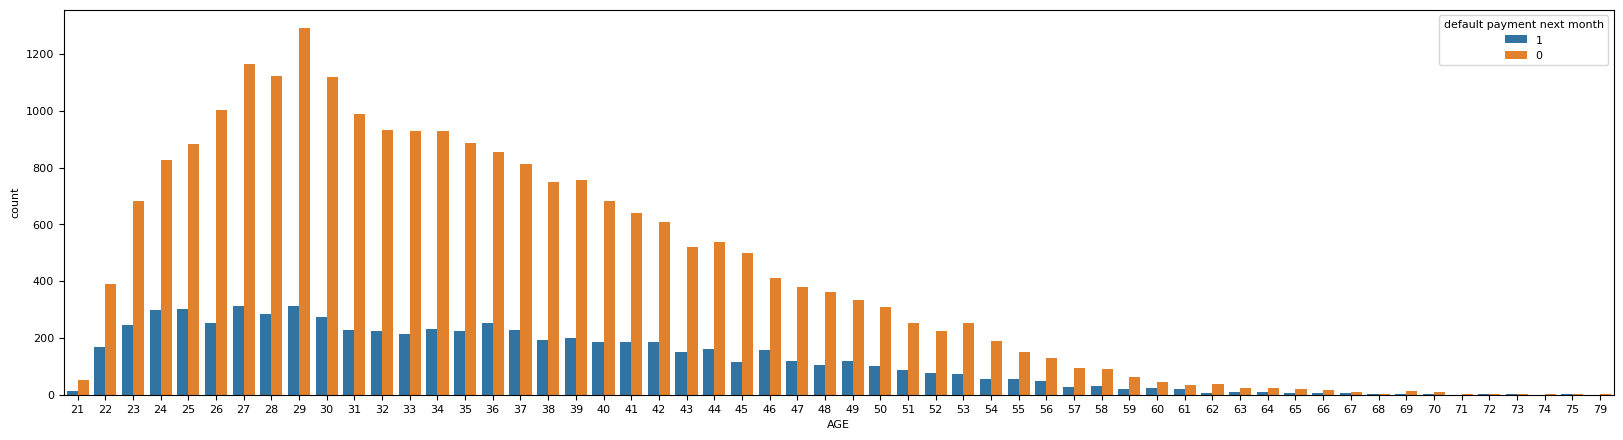

In [445]:
# Quel groupe d'age a plus de fumeurs
plt.figure(figsize=(20,5))

df_fisc['default payment next month'] = df_fisc['default payment next month'].astype(str)

sns.countplot(x='AGE', data=df_fisc, hue='default payment next month')
plt.xlabel("AGE")
plt.show()

### Élimination des valeurs abérantes

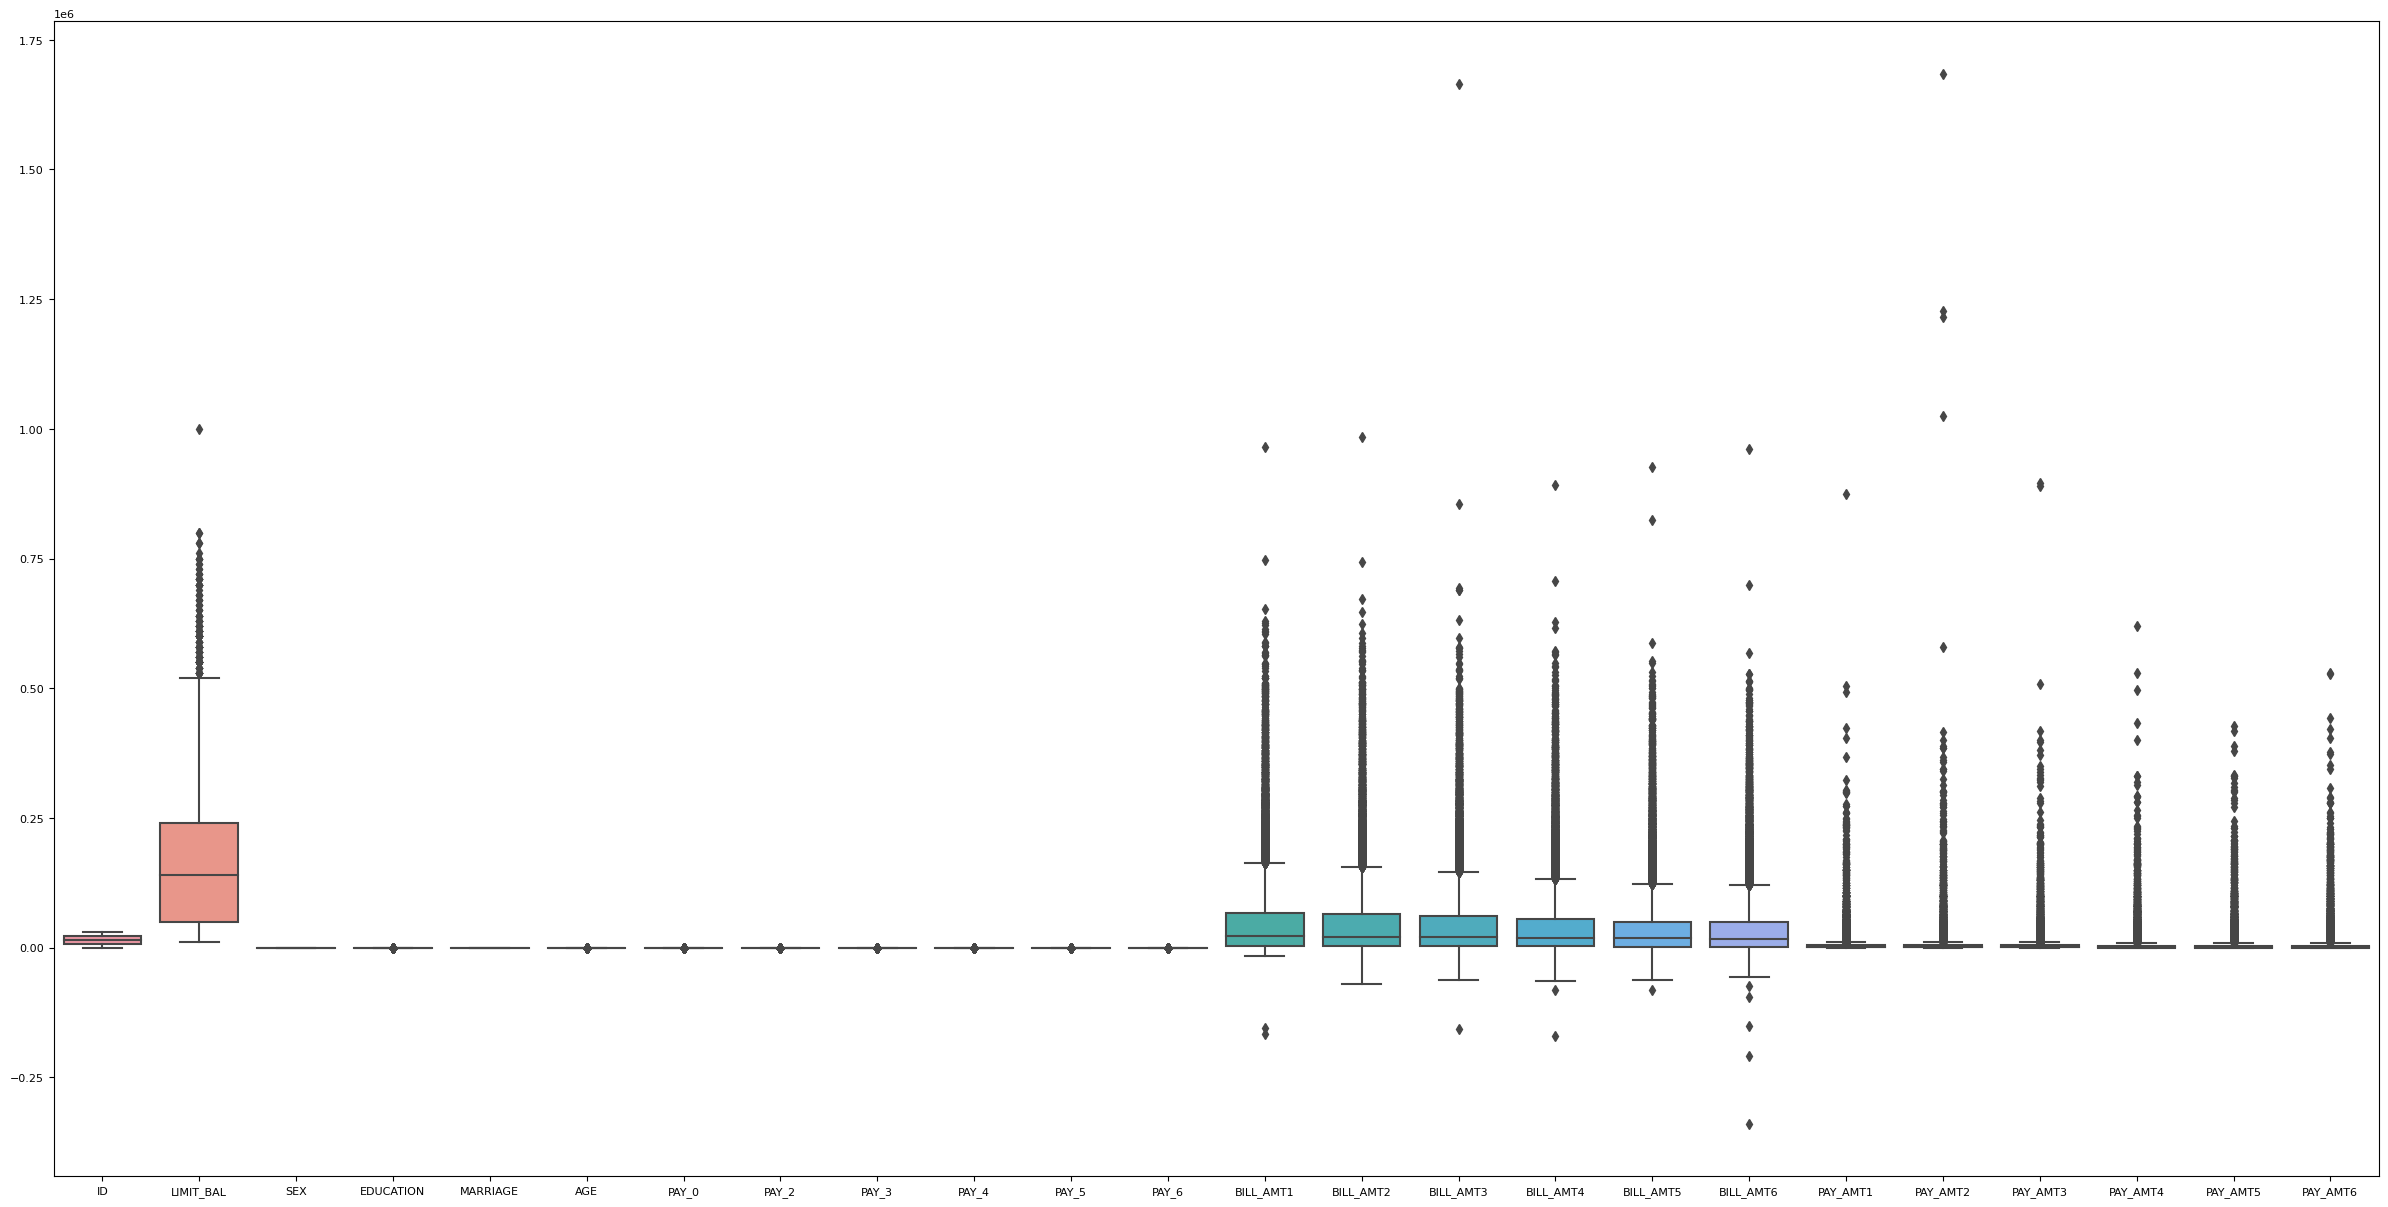

In [446]:
plt.figure(figsize=(30,15))
sns.boxplot(data=df_fisc)
plt.show()

In [447]:
df_fisc.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [448]:
df_temp = df_fisc.drop(columns = ['ID', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE','PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])

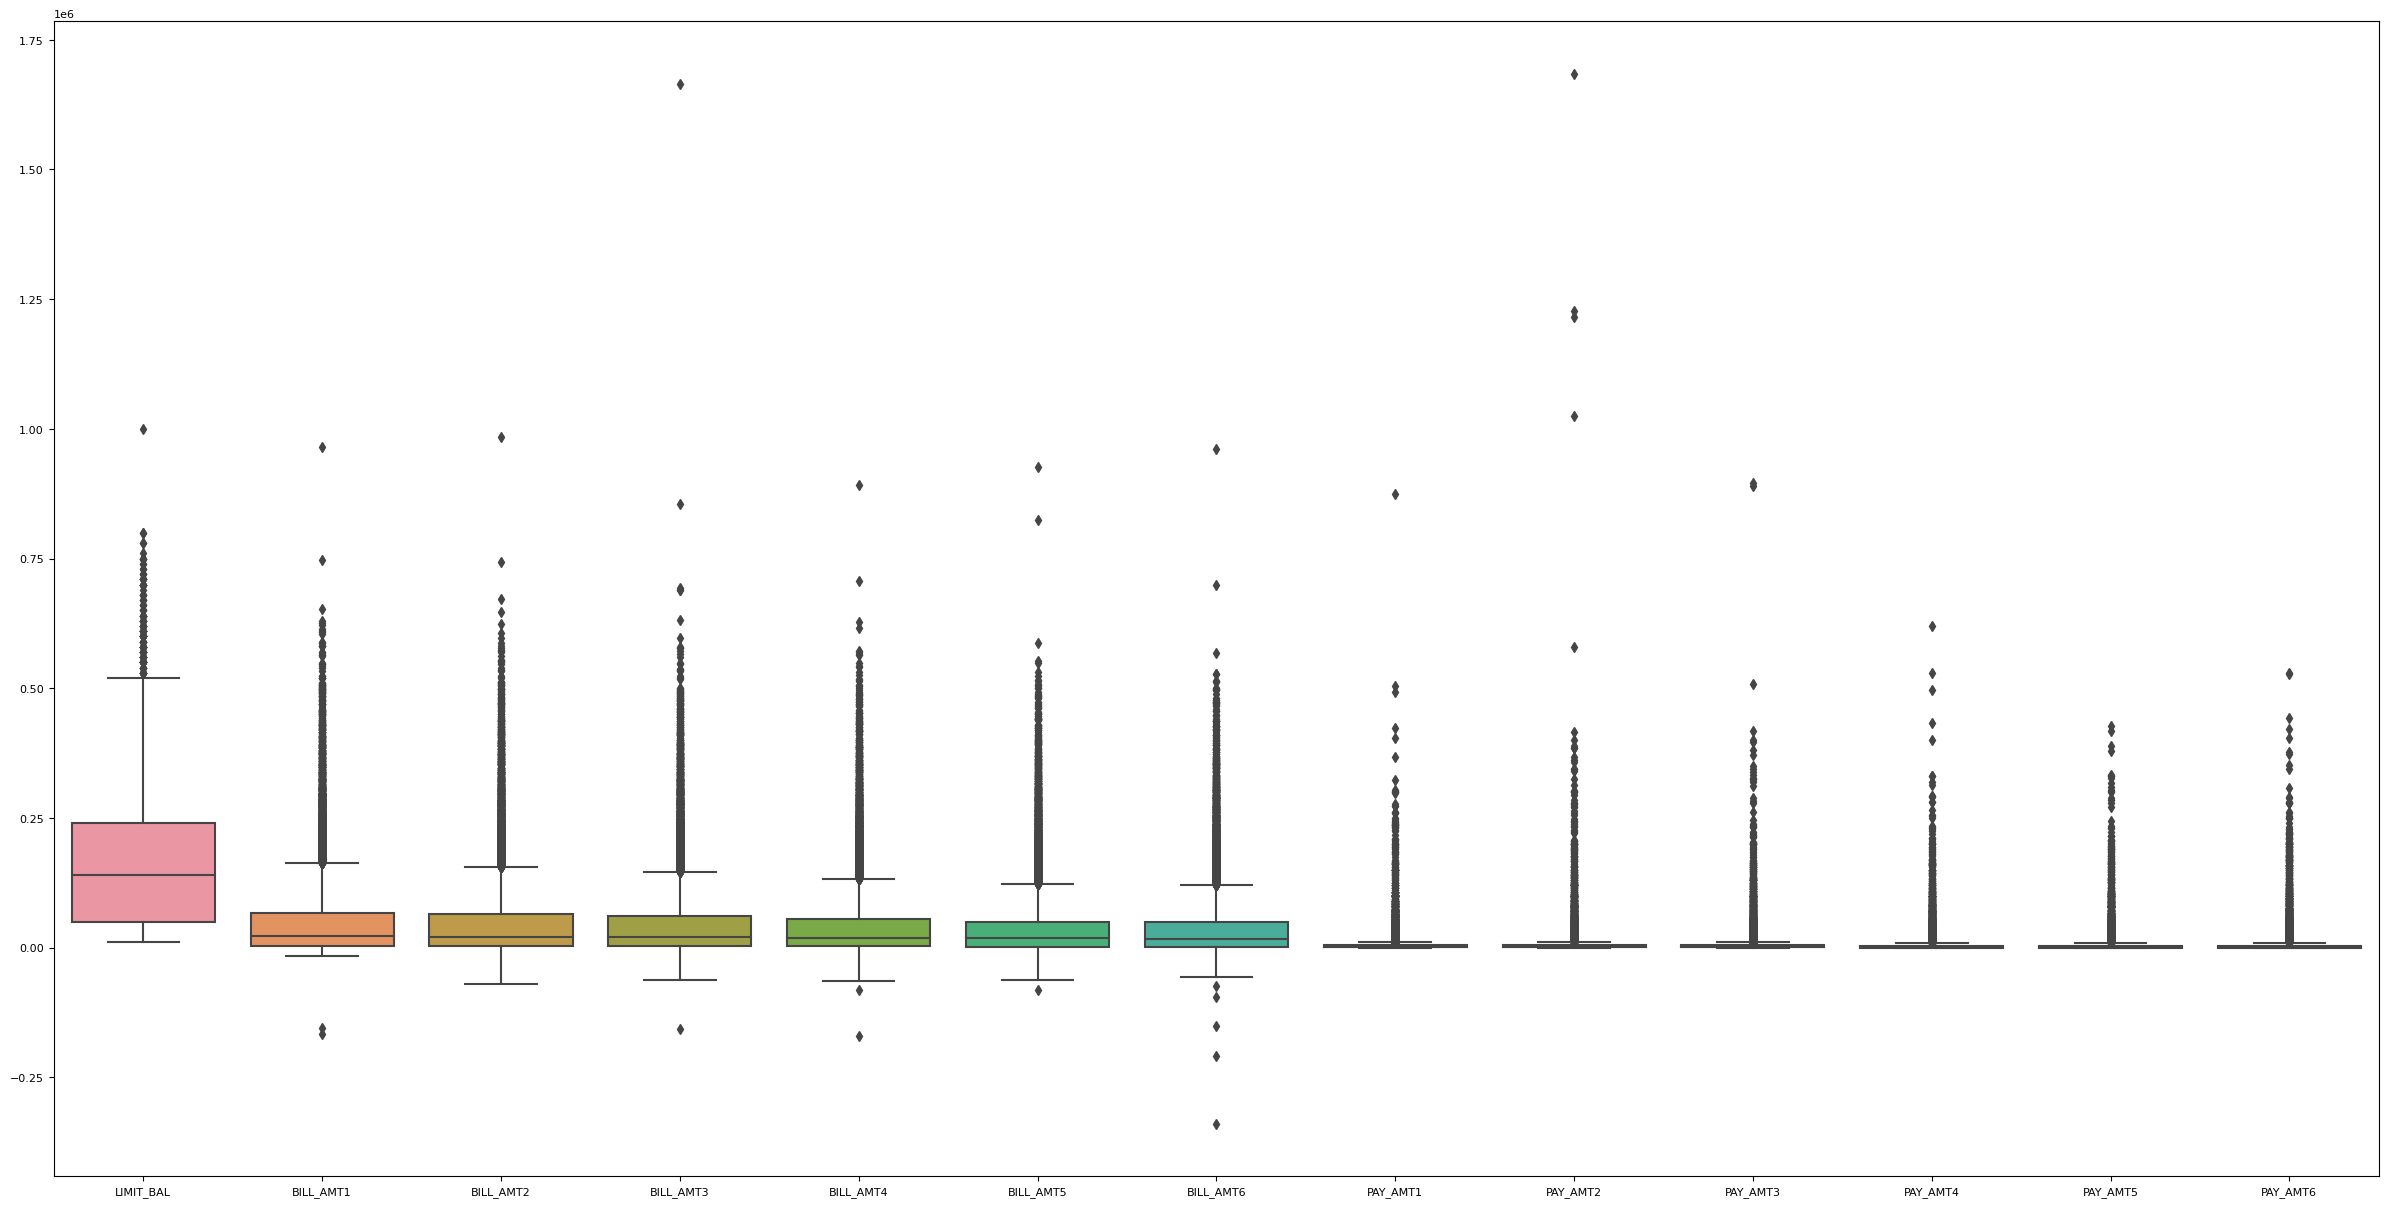

In [449]:
plt.figure(figsize=(30,15))
sns.boxplot(data=df_temp)
plt.show()

In [450]:
df_temp = df_temp.drop(columns = ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT2'])

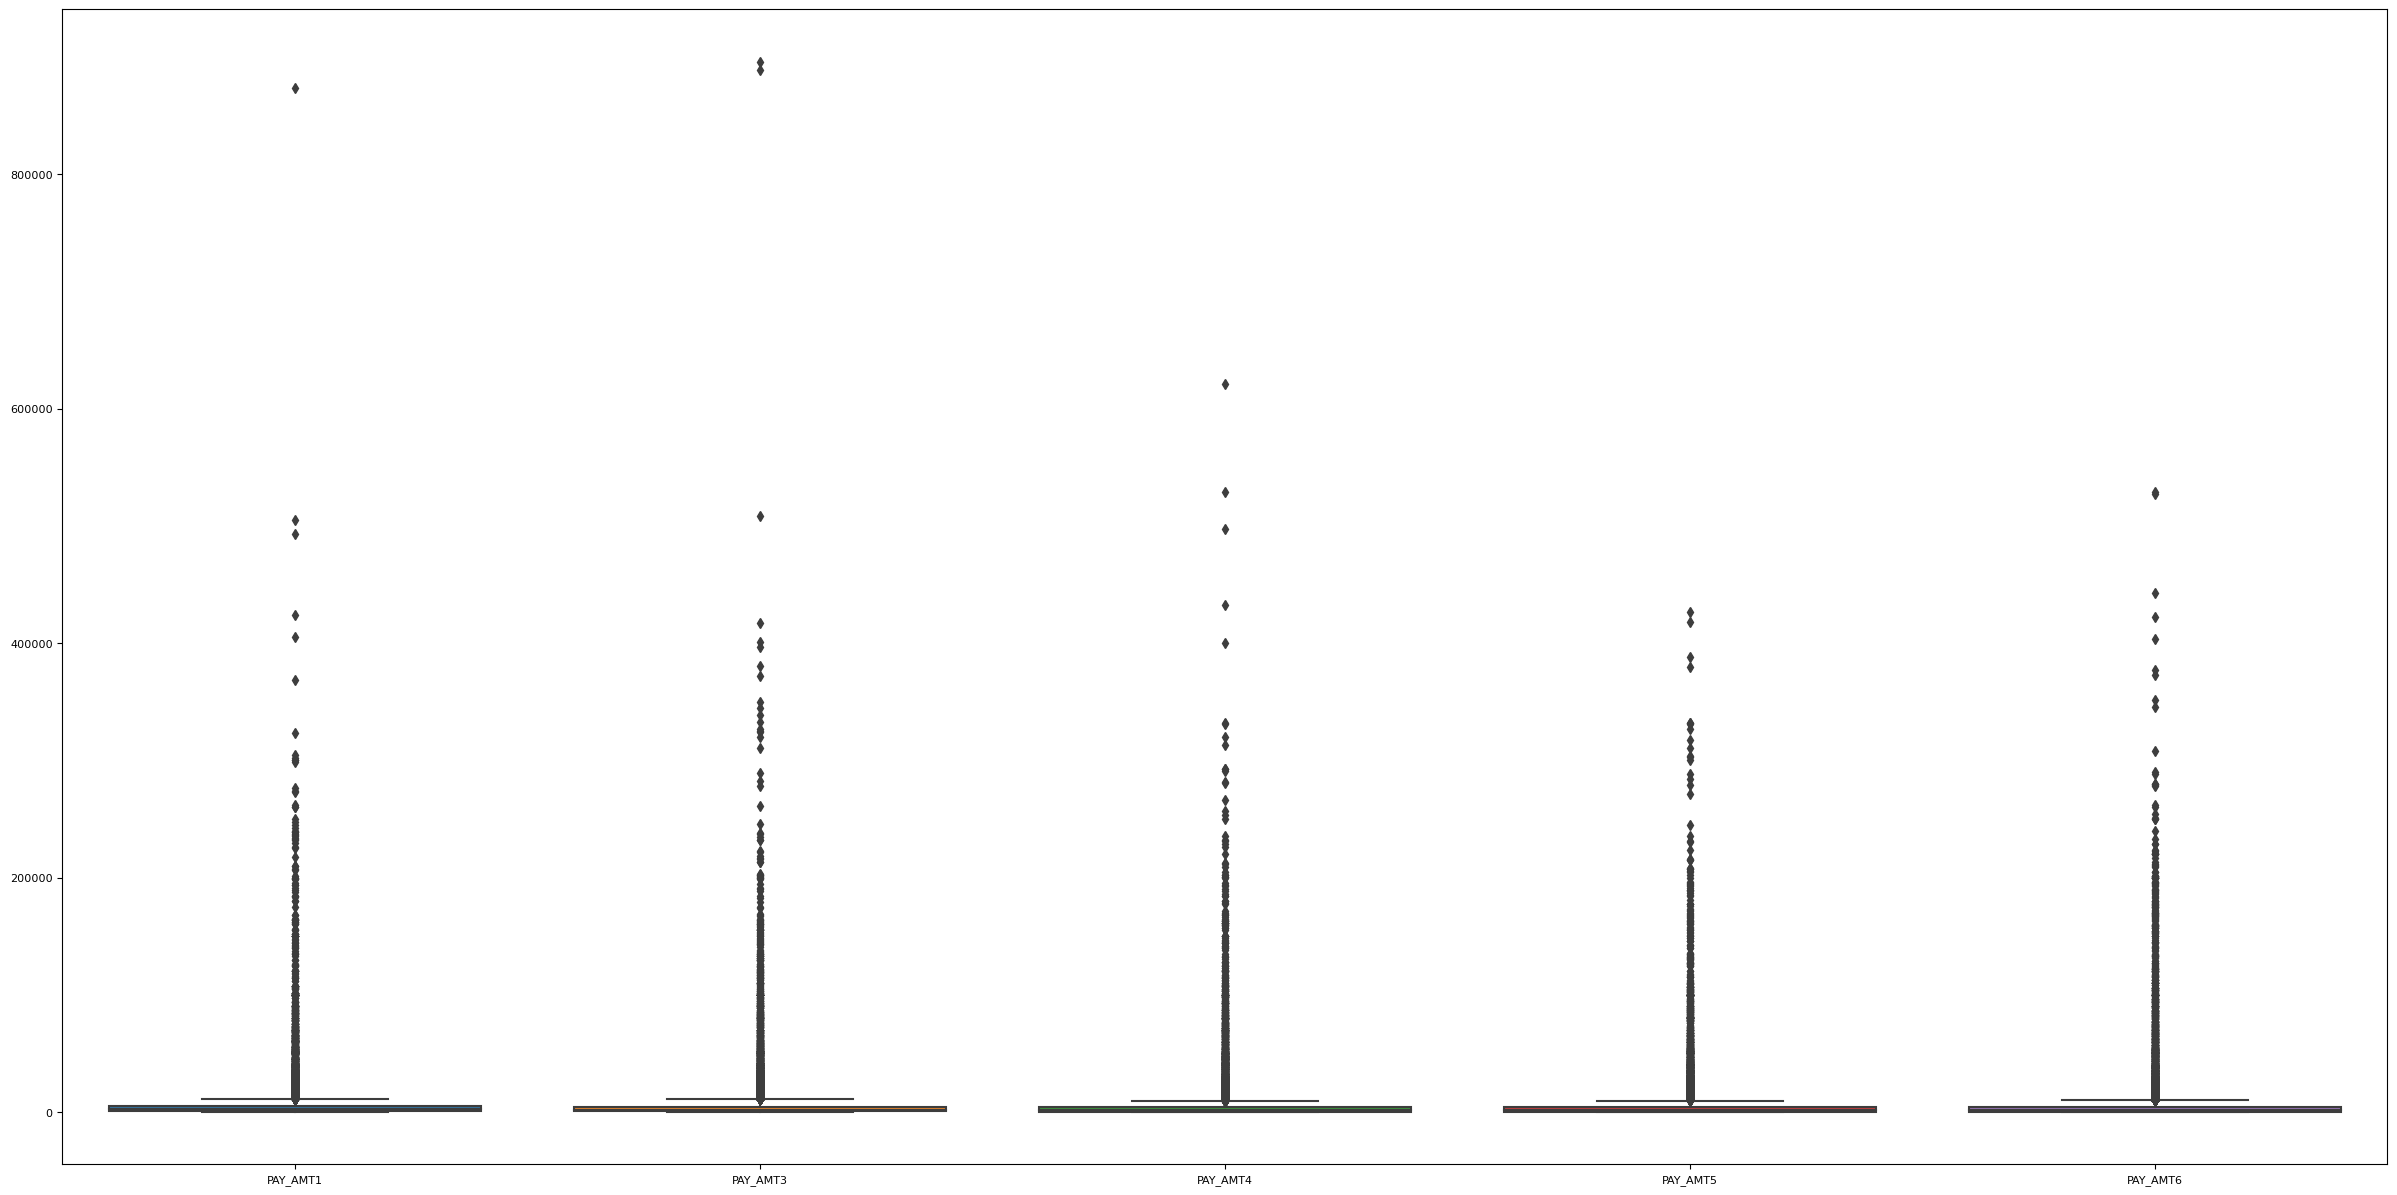

In [451]:
plt.figure(figsize=(30,15))
sns.boxplot(data=df_temp)
plt.show()

In [452]:
df_fisc['BILL_AMT3'].max()

1664089

In [453]:
df_fisc['PAY_AMT2'].max()

1684259

In [454]:
df_fisc['LIMIT_BAL'].max()

1000000

In [455]:
df_fisc['BILL_AMT1'].max()

964511

In [456]:
df_fisc['PAY_AMT6'].max()

528666

In [457]:
df_fisc = df_fisc[df_fisc['LIMIT_BAL'] < 1000000]
df_fisc = df_fisc[df_fisc['BILL_AMT1'] < 740000]
df_fisc = df_fisc[df_fisc['BILL_AMT2'] < 740000]
df_fisc = df_fisc[df_fisc['BILL_AMT3'] < 740000]
df_fisc = df_fisc[df_fisc['BILL_AMT4'] < 740000]
df_fisc = df_fisc[df_fisc['BILL_AMT5'] < 740000]
df_fisc = df_fisc[df_fisc['BILL_AMT6'] < 650000]
df_fisc = df_fisc[df_fisc['PAY_AMT1'] < 600000]
df_fisc = df_fisc[df_fisc['PAY_AMT2'] < 500000]
df_fisc = df_fisc[df_fisc['PAY_AMT2'] < 430000]
df_fisc = df_fisc[df_fisc['PAY_AMT2'] < 400000]
df_fisc = df_fisc[df_fisc['PAY_AMT6'] < 520000]

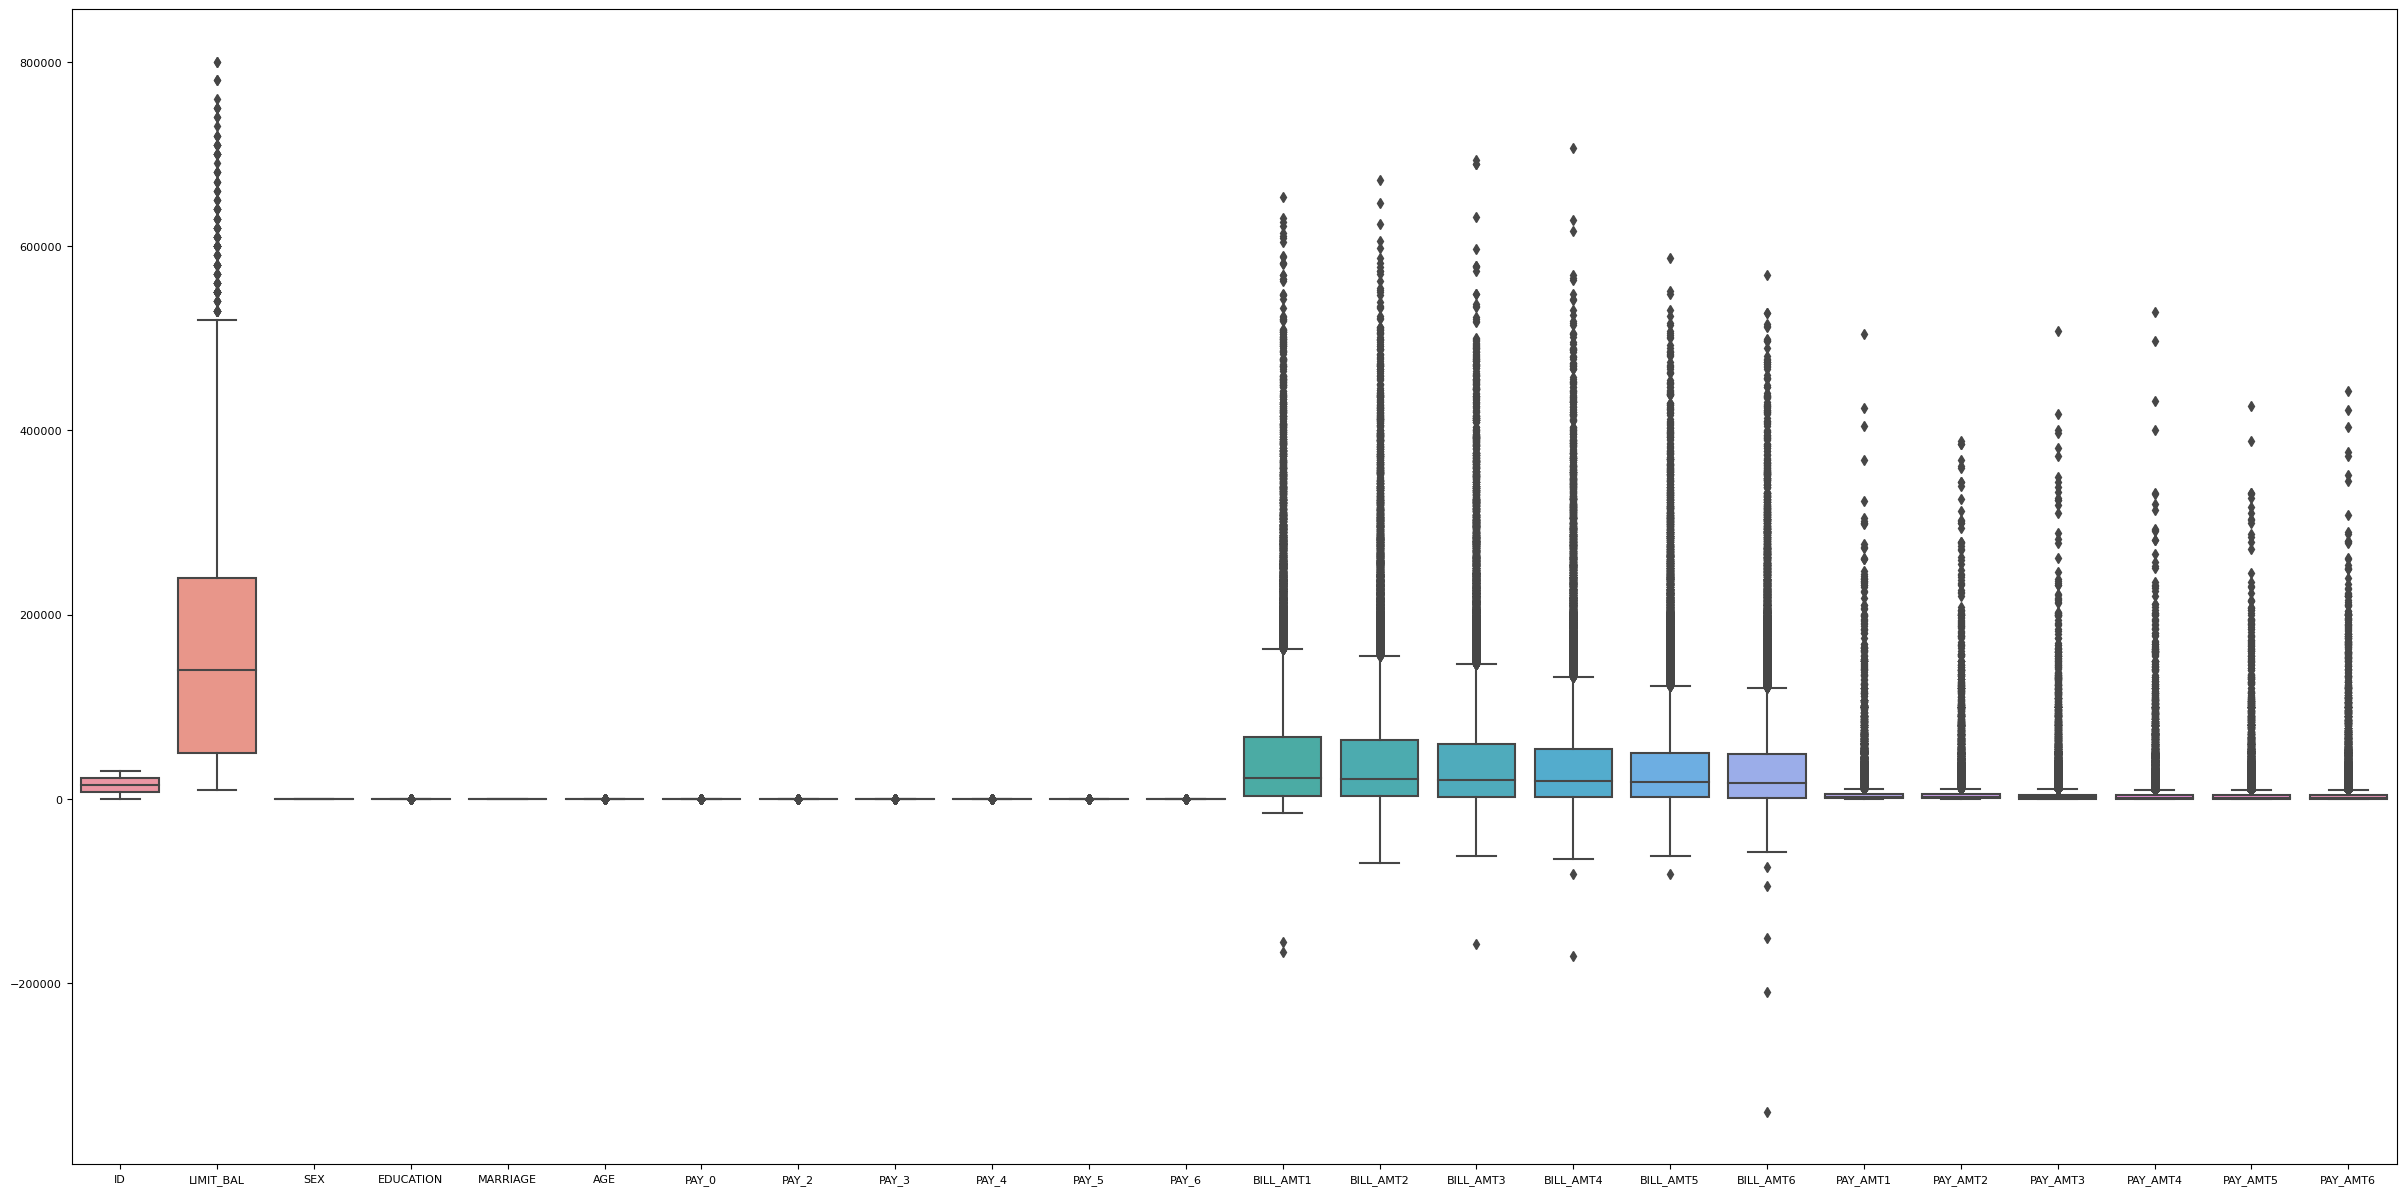

In [458]:
plt.figure(figsize=(30,15))
sns.boxplot(data=df_fisc)
plt.show()

### Séparation en données de train et test

In [459]:
from sklearn.model_selection import train_test_split
X = df_fisc.drop('default payment next month', axis=1)
Y = df_fisc['default payment next month']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_test = X_test.drop(columns = 'ID')
X_train = X_train.drop(columns = 'ID')

Y_train = pd.DataFrame(Y_train)
Y_train = Y_train.astype('int64')

Y_test = pd.DataFrame(Y_test)
Y_test = Y_test.astype('int64')

### Choix des variables

In [460]:
select = SelectKBest(k=10)
z = select.fit_transform(X_train, Y_train)

In [461]:
z.shape

(23988, 10)

In [462]:
selection_scores = pd.DataFrame(select.scores_)
data_columns = pd.DataFrame(X_train.columns)

In [463]:
scores = pd.concat([data_columns, selection_scores],axis=1)
scores.columns=['Feature','Score']
print(scores.nlargest(11,'Score'))

      Feature        Score
5       PAY_0  2752.510865
6       PAY_2  1809.074181
7       PAY_3  1419.749021
8       PAY_4  1198.466957
9       PAY_5  1035.780518
10      PAY_6   882.047487
0   LIMIT_BAL   566.914334
17   PAY_AMT1   154.475260
18   PAY_AMT2   123.054277
22   PAY_AMT6    84.551874
20   PAY_AMT4    76.973444


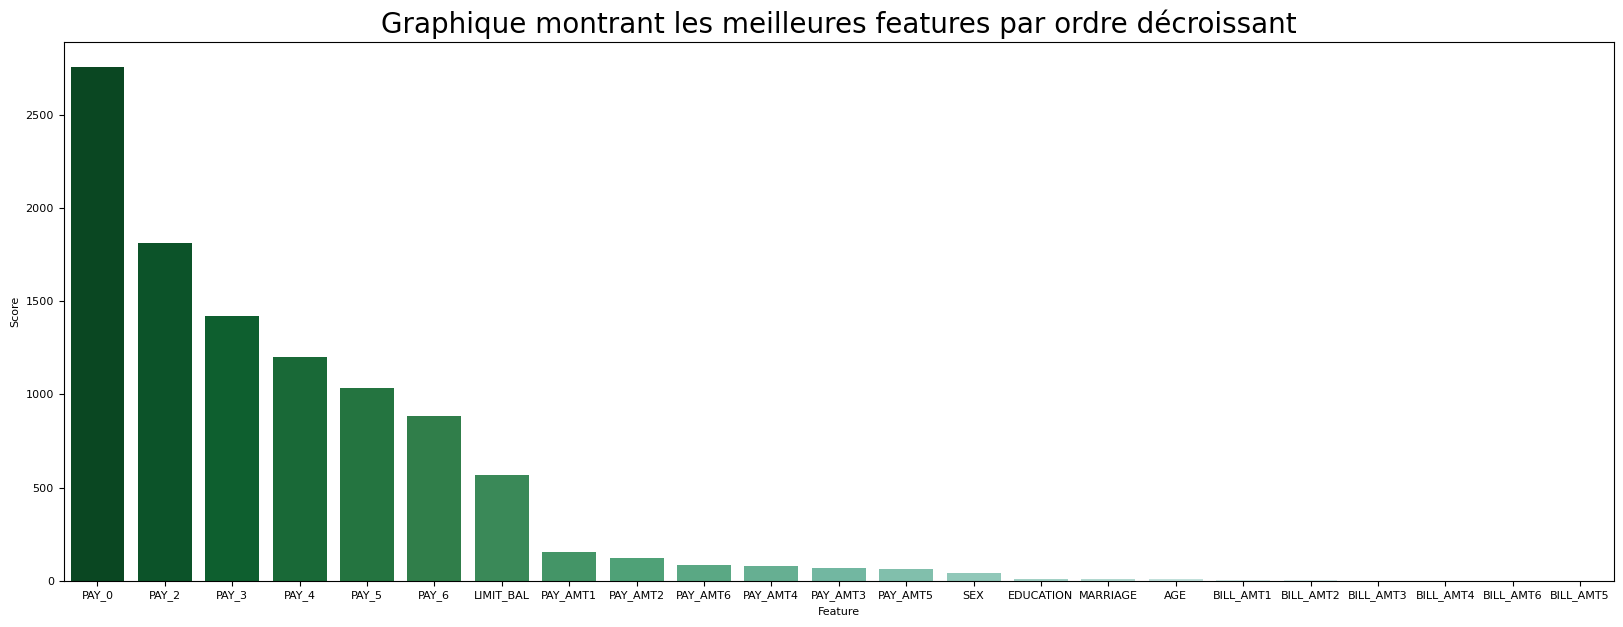

In [464]:
scores = scores.sort_values(by="Score", ascending=False)
plt.figure(figsize=(20,7), facecolor='w')
sns.barplot(x='Feature',y='Score',data=scores,palette='BuGn_r')
plt.title("Graphique montrant les meilleures features par ordre décroissant", size=20)
plt.show()

### Normalisation des données

In [567]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# SCALING
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)



### Suréchantillonnage SMOTE

In [568]:
from imblearn.over_sampling import SMOTE

# SMOTE
sm = SMOTE(random_state=42)
X_train_res, Y_train_res = sm.fit_resample(X_train_scaled, Y_train)

## Modèle 1 : Réduction de la dimension 

In [571]:
# REDUCTION DE LA DIMENSION 
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, LocallyLinearEmbedding, Isomap, TSNE

## EVALUATION: COURBE ROC
from sklearn.metrics import auc # aire sous la courbe 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import precision_recall_curve #
from sklearn.metrics import f1_score, recall_score
from sklearn.metrics import average_precision_score

# Kernel PCA
from sklearn.decomposition import KernelPCA

In [569]:
n_components = 23
random_state = 0

pca = PCA(n_components=n_components, random_state=random_state)

X_train_pca = pca.fit_transform(X_train_scaled)
X_train_pca = pd.DataFrame(data=X_train_pca, index=X_train.index)

In [570]:
X_train_pca.shape

(23988, 23)

In [572]:
X_train_pca_inverse = pca.inverse_transform(X_train_pca)
X_train_pca_inverse = pd.DataFrame(data=X_train_pca_inverse, index=X_train.index)

In [573]:
X_train_pca_inverse.head()

0         1         2         3         4         5         6   \
17565  0.105520  0.810962  0.185877 -1.057809  0.489775 -0.879160 -0.725788   
619    0.260879  0.810962  0.185877 -1.057809  0.381405  0.016161  0.111321   
17092 -0.826629  0.810962  0.185877  0.859579 -1.352517  0.016161  0.111321   
22596  1.270707  0.810962  1.455112 -1.057809  0.489775  0.016161  0.111321   
26958  0.183200 -1.233103  1.455112 -1.057809  0.598146  0.016161  0.111321   

             7         8         9         10        11        12        13  \
17565 -0.696479 -0.668039 -0.649325 -1.488377 -0.686032 -0.651700 -0.556807   
619    0.139923  0.186532  0.233169  0.250485  0.408549  0.426845  0.354146   
17092  0.139923  0.186532  0.233169  0.250485  0.083518  0.130171  0.176154   
22596  0.139923  0.186532  0.233169  0.250485  0.411986  0.479739  0.555480   
26958  0.139923  0.186532  0.233169  0.250485 -0.281716 -0.247852 -0.208667   

             14        15        16        17        18        19        20  \
17565 -0.519364 -0.666803 -0.524770 -0.176111  0.178098  0.293419 -0.311674   
619    0.450267  0.511343  0.543666 -0.147041 -0.155745 -0.160175 -0.145641   
17092  0.261521  0.282769  0.322199 -0.190779 -0.208693 -0.190624 -0.181780   
22596  0.596330  0.707271  0.774670 -0.161376 -0.159400 -0.133794 -0.117028   
26958 -0.149619 -0.099037 -0.065325 -0.270253 -0.249494 -0.225881 -0.235762   

             21        22  
17565  0.196355 -0.099143  
619   -0.146519 -0.147797  
17092 -0.176915 -0.179921  
22596 -0.110358 -0.111571  
26958 -0.232795 -0.230157

In [574]:
def anomaly_scores(X_original, X_reduced):
    loss = np.sum((np.array(X_original) - np.array(X_reduced))**2, axis=1)
    loss = pd.Series(data=loss, index=X_original.index)
    loss = (loss - np.min(loss)) / (np.max(loss) - np.min(loss)) # loss entre 0. et 1.
    return loss

def plotResults(labels, anomaly_scores, returnPreds=False):

    df_preds = pd.concat([labels, anomaly_scores], axis=1)
    df_preds.columns = ['Labels', 'AnomalyScores']
    precision, recall, thresholds = precision_recall_curve(df_preds['Labels'], df_preds['AnomalyScores'])
    average_precision = average_precision_score(df_preds['Labels'], df_preds['AnomalyScores'])
    
    plt.step(recall, precision, color='k', alpha=0.7, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')
        
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    
    plt.title('Courbe Precision-Recall : Moyenne de précision = \
    {0:0.2f}'.format(average_precision))

    fpr, tpr, thresholds = roc_curve(df_preds['Labels'], \
                                     df_preds['AnomalyScores'])
    areaUnderROC = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='r', lw=2, label='Courbe ROC')
    plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taux de faux positifs (FPR)')
    plt.ylabel('Taux de vrais positifs (TPR)')
    plt.title('Courbe ROC: \
    Aire sous la courbe ROC = {0:0.2f}'.format(areaUnderROC))
    plt.legend(loc="lower right")
    plt.show()
    
    if returnPreds==True:
        return df_preds
    
def scatterPlot(X, y):
    temp = pd.DataFrame(data=X.loc[:,0:1], index=X.index)
    temp = pd.concat((temp,y), axis=1, join="inner")
    temp.columns = ["PC1", "PC2", "Label"]
    sns.lmplot(x="PC1", y="PC2", hue="Label", \
               data=temp, fit_reg=False)
    ax = plt.gca()

In [575]:
anomalyScores = anomaly_scores(X_train, X_train_pca_inverse)

In [576]:
anomalyScores.head()

17565    0.013900
619      0.030890
17092    0.010063
22596    0.063528
26958    0.018000
dtype: float64

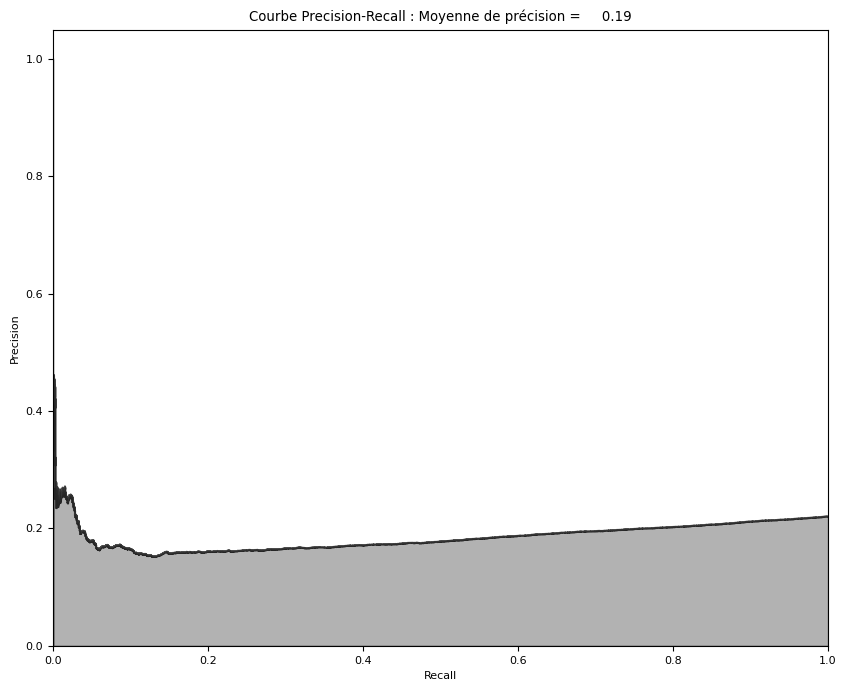

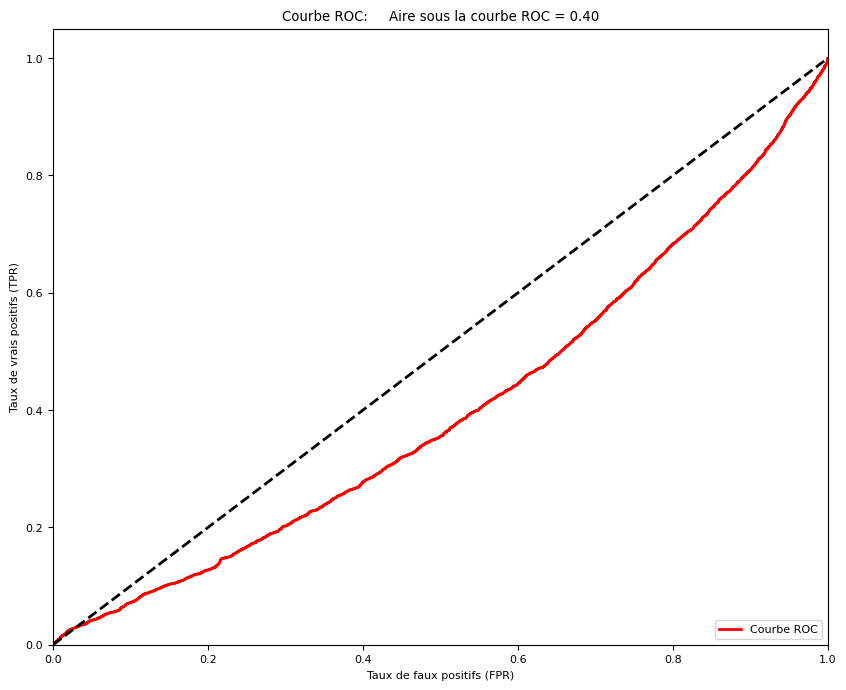

In [577]:
df_preds = plotResults(Y_train, anomalyScores, True)

In [594]:
df_preds.sort_values(by="AnomalyScores",ascending=False,inplace=True)
cutoff = 391
predsTop = df_preds[:cutoff]
print("Precision: ",np.round(predsTop.AnomalyScores[predsTop.Labels==1].count()/cutoff,2))
print("Recall: ",np.round(predsTop.AnomalyScores[predsTop.Labels==1].count()/Y_train.sum(),2))
print("DefaultPayment:", predsTop.Labels.sum())

Precision:  0.66
Recall:  default payment next month    0.05
dtype: float64
DefaultPayment: 257


ValueError: Classification metrics can't handle a mix of binary and continuous targets

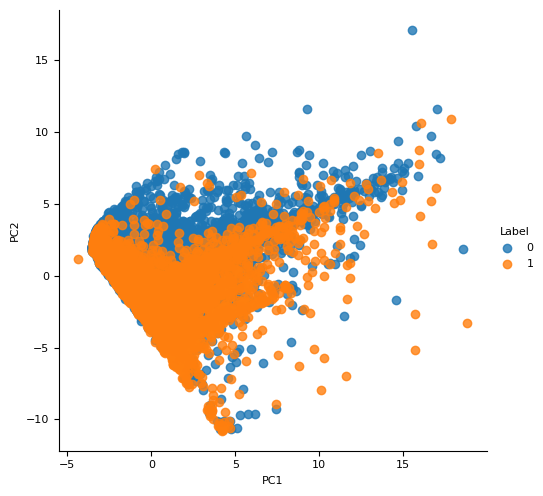

In [ ]:
scatterPlot(X_train_pca, Y_train)

In [ ]:
n_components = 14
kernel = 'rbf'
gamma = None
fit_inverse_transform = True
random_state = 0
n_jobs = 3

kernelPCA = KernelPCA(n_components=n_components, kernel=kernel, \
                gamma=gamma, fit_inverse_transform= \
                fit_inverse_transform, n_jobs=n_jobs, \
                random_state=random_state)

kernelPCA.fit(X_train.iloc[:300])
X_train_kernelPCA = kernelPCA.transform(X_train)
X_train_kernelPCA = pd.DataFrame(data=X_train_kernelPCA, \
                                 index=X_train.index)

X_train_kernelPCA_inverse = kernelPCA.inverse_transform(X_train_kernelPCA)
X_train_kernelPCA_inverse = pd.DataFrame(data=X_train_kernelPCA_inverse, \
                                         index=X_train.index)

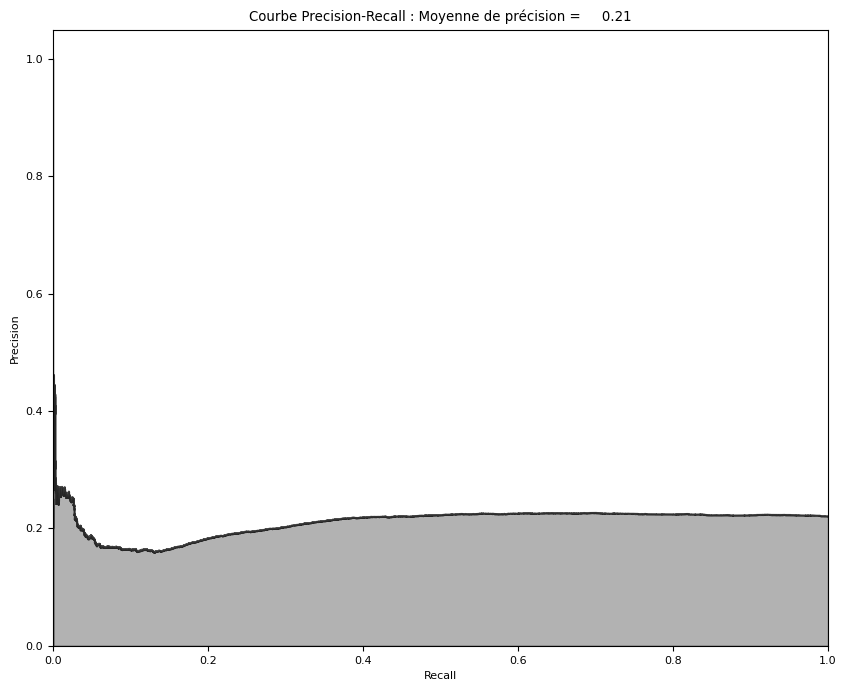

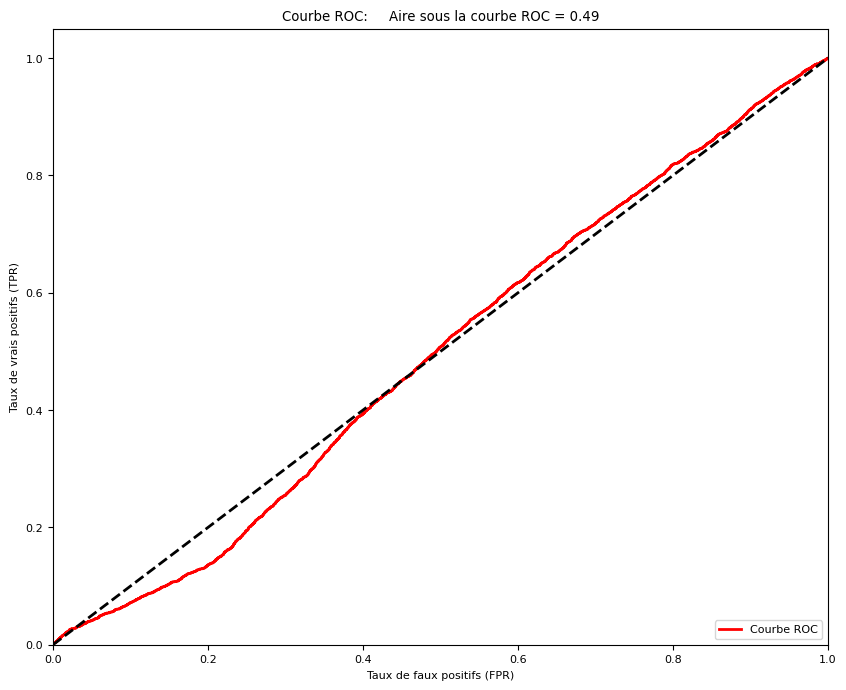

In [ ]:
anomalyScoresKernelPCA = anomaly_scores(X_train, X_train_kernelPCA_inverse)
df_preds = plotResults(Y_train, anomalyScoresKernelPCA, True)

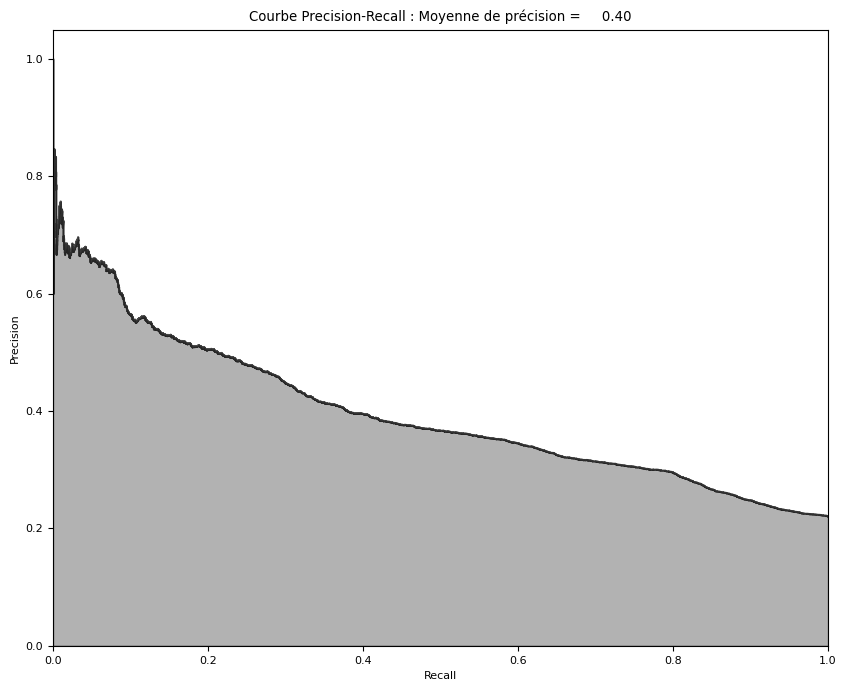

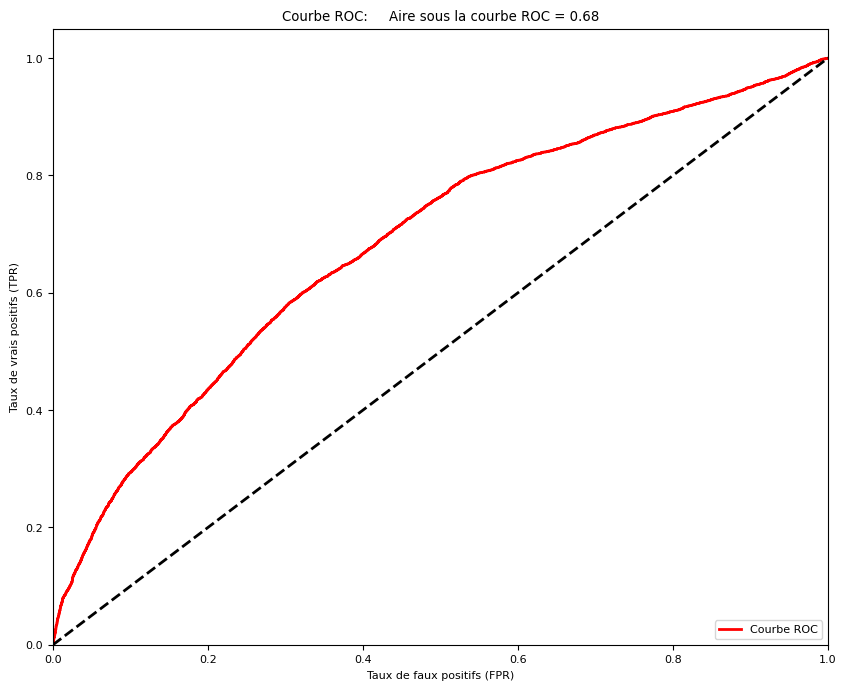

In [ ]:
n_components = 14

pca = PCA(n_components=n_components, random_state=0)

X_train_pca = pca.fit_transform(X_train)
X_train_pca = pd.DataFrame(data=X_train_pca, index=X_train.index)

X_train_pca_inverse = pca.inverse_transform(X_train_pca)
X_train_pca_inverse = pd.DataFrame(data=X_train_pca_inverse, index=X_train.index)
anomalyScores = anomaly_scores(X_train, X_train_pca_inverse)
df_preds = plotResults(Y_train, anomalyScores, True)

In [ ]:
df_preds.sort_values(by="AnomalyScores",ascending=False,inplace=True)
cutoff = 391
predsTop = df_preds[:cutoff]
print("Precision: ",np.round(predsTop.AnomalyScores[predsTop.Labels==1].count()/cutoff,2))
print("Recall: ",np.round(predsTop.AnomalyScores[predsTop.Labels==1].count()/Y_train.sum(),2))
print("DefaultPayment:", predsTop.Labels.sum())


Precision:  0.66
Recall:  default payment next month    0.05
dtype: float64
DefaultPayment: 257


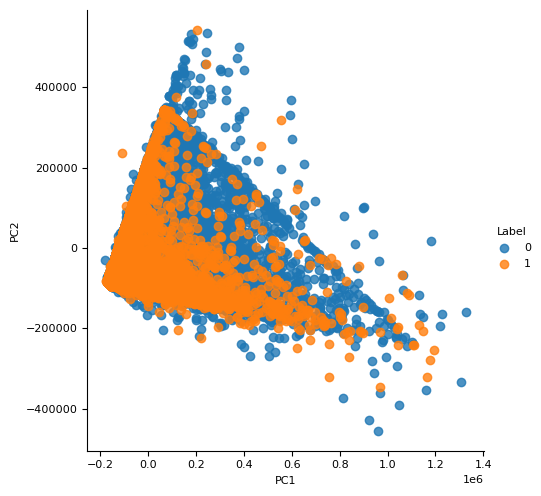

In [ ]:
scatterPlot(X_train_pca, Y_train)

## Modèle 2 : Regression logistique 

Régression logistique

Rapport de classification:
              precision    recall  f1-score   support

           0       0.81      0.76      0.78      4654
           1       0.31      0.37      0.33      1344

    accuracy                           0.67      5998
   macro avg       0.56      0.56      0.56      5998
weighted avg       0.69      0.67      0.68      5998
 

Exactitude: 67.455819 



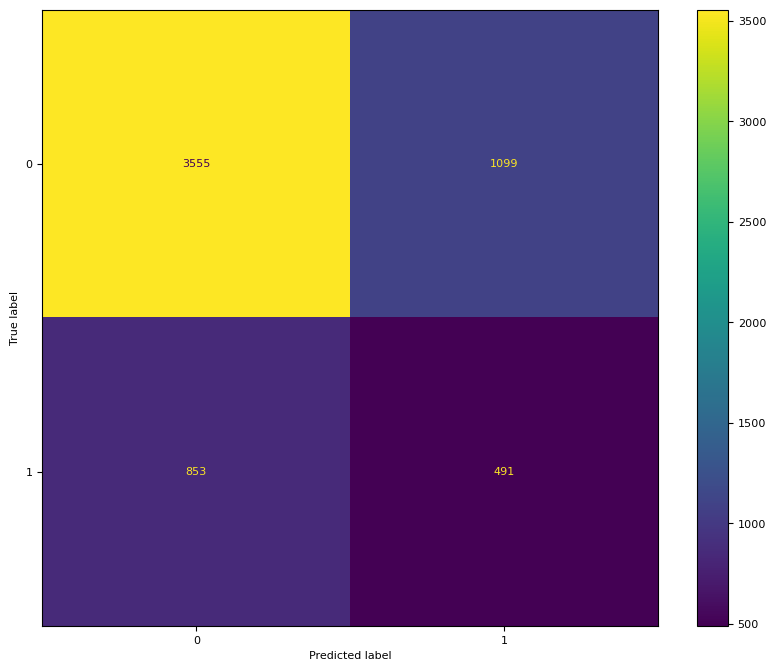

In [ ]:
# Regression logistique
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Modèles
logreg = LogisticRegression(penalty='none', tol=10e-6, random_state=7)
logregRidge = LogisticRegression(C=0.1, penalty='l2', tol=10e-6, random_state=7)
logregLasso = LogisticRegression(C=0.1, penalty='l1', solver='liblinear', tol=10e-6, random_state=7)
logregElasticNet = LogisticRegression(C=0.1, penalty='elasticnet', solver='saga', l1_ratio=0.7, tol=10e-6, random_state=7)

smt = SMOTE(random_state=7)

# Do the process
X_train_up, y_train_up = smt.fit_resample(X_train, Y_train)

# Regression normal
logreg.fit(X_train_up, y_train_up)
Y_pred = logreg.predict(X_test)

print('='*20)
print('Régression logistique')
print('='*20, '\n')

print("Rapport de classification:")
print(classification_report(Y_test, Y_pred), '\n')
print('Exactitude: %f' %(accuracy_score(Y_test,Y_pred)*100), '\n')
c_matrix = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix) 
disp.plot() 
plt.show()

Régression logistique + Lasso

Matrice de confusion:
[[3374 1280]
 [ 558  786]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.86      0.72      0.79      4654
           1       0.38      0.58      0.46      1344

    accuracy                           0.69      5998
   macro avg       0.62      0.65      0.62      5998
weighted avg       0.75      0.69      0.71      5998
 

Exactitude: 69.356452 



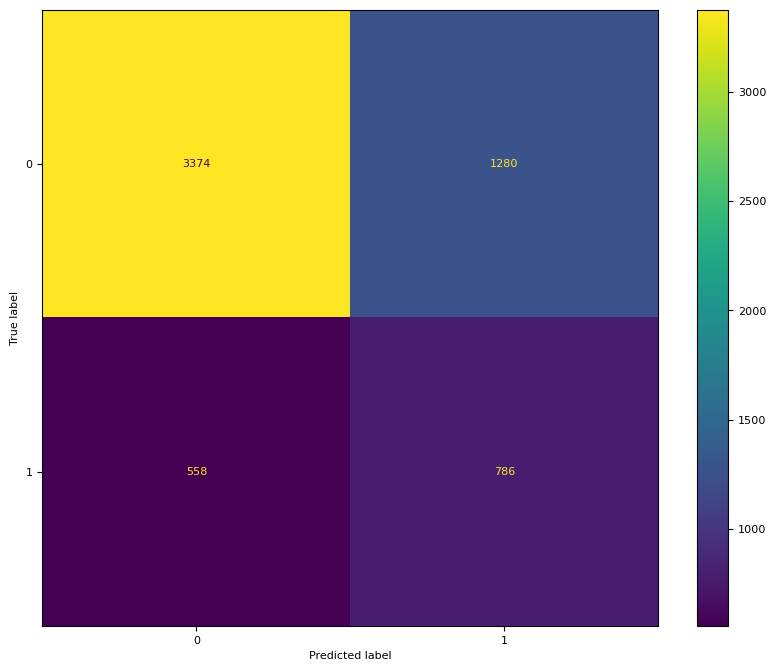

In [ ]:
logregLasso.fit(X_train_up, y_train_up)
y_pred = logregLasso.predict(X_test)

print('='*30)
print('Régression logistique + Lasso')
print('='*30, '\n')

print("Matrice de confusion:")
print(confusion_matrix(Y_test, y_pred), '\n') # afficher à l'écran notre matrice de confusion
print("Rapport de classification:")
print(classification_report(Y_test, y_pred), '\n')
print('Exactitude: %f' %(accuracy_score(Y_test,y_pred)*100), '\n')
c_matrix = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix)
disp.plot()
plt.show()

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.74      0.80      4654
           1       0.40      0.60      0.48      1344

    accuracy                           0.71      5998
   macro avg       0.63      0.67      0.64      5998
weighted avg       0.76      0.71      0.73      5998



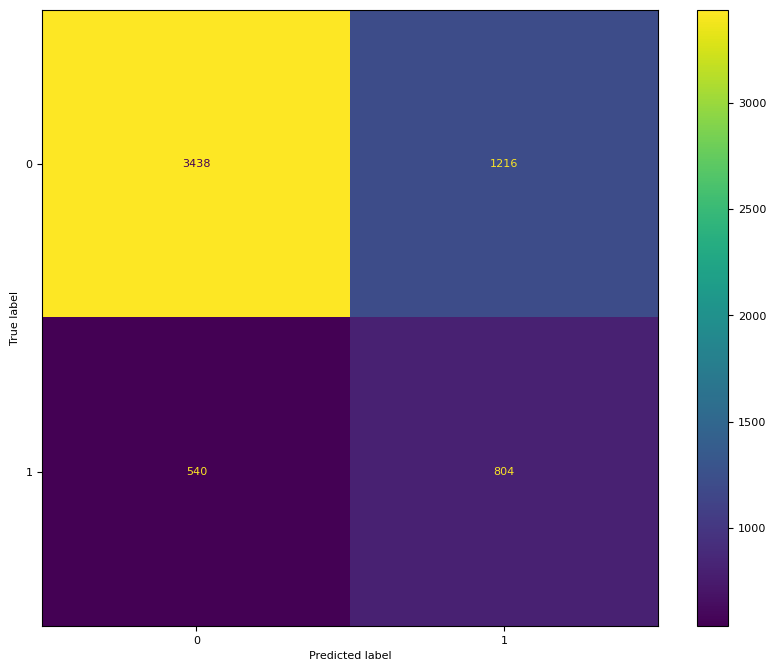

In [ ]:
import optuna

# Fonction objectif pour Optuna
def objectiveNormal(trial):
    # Définir l'espace de recherche des hyperparamètres
    C = trial.suggest_loguniform('C', 1e-5, 1e3)
    max_iter = trial.suggest_int('max_iter', 50, 1500)

    # Créer le modèle avec les hyperparamètres choisis
    log_reg = LogisticRegression(C=C, max_iter=max_iter, solver="liblinear")
    
    # Entraîner le modèle
    log_reg.fit(X_train_up, y_train_up)
    
    # Faire des prédictions
    y_pred = log_reg.predict(X_test)
    
    # Calculer le score F1
    f1 = f1_score(Y_test, y_pred)
    
    return f1

# Créer une étude et optimiser les hyperparamètres
#study = optuna.create_study(direction='maximize')
#study.optimize(objectiveNormal, n_trials=600)

# Afficher les meilleurs hyperparamètres trouvés
#print("Best trial:")
#trial = study.best_trial
#print("  F1-Score: ", trial.value)
#print("  Best hyperparameters: ", trial.params)

# Entraîner et évaluer le modèle avec les meilleurs hyperparamètres
#best_log_reg = LogisticRegression(C=trial.params['C'], max_iter=trial.params['max_iter'], solver='liblinear')
params = {'C': 0.05336953897549652, 'max_iter': 415}
best_log_reg = LogisticRegression(C=params['C'], max_iter=params['max_iter'], solver='liblinear')
best_log_reg.fit(X_train_up, y_train_up)
y_pred = best_log_reg.predict(X_test)
print("Classification Report:\n", classification_report(Y_test, y_pred))
c_matrix = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix)
disp.plot()
plt.show()

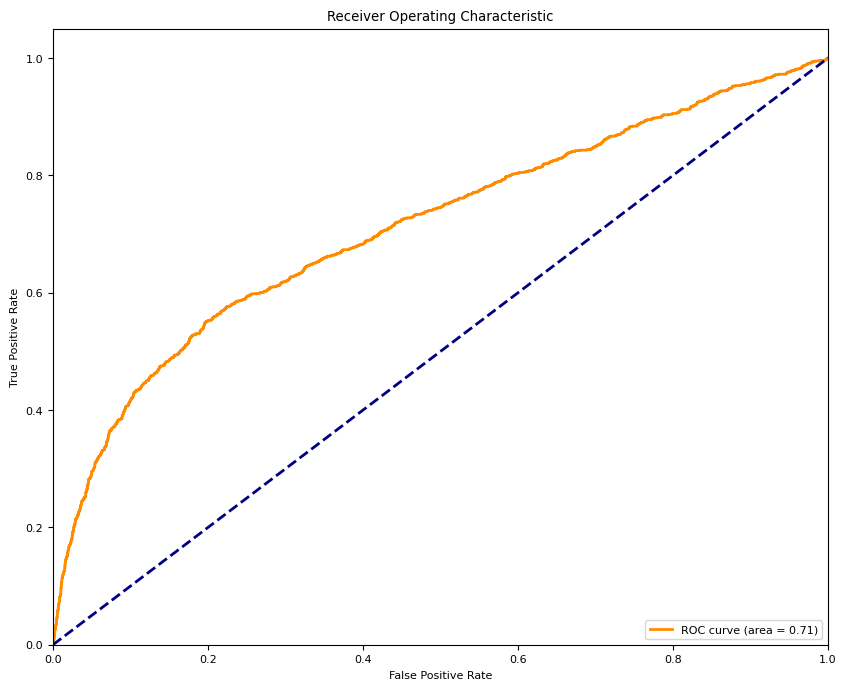

In [ ]:
# Prédictions de probabilité pour la courbe ROC
y_proba1 = best_log_reg.predict_proba(X_test)[:, 1]

# Calculer les valeurs ROC
fpr1, tpr1, _ = roc_curve(Y_test, y_proba1)
roc_auc1 = auc(fpr1, tpr1)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.73      0.80      4654
           1       0.40      0.62      0.49      1344

    accuracy                           0.71      5998
   macro avg       0.64      0.68      0.64      5998
weighted avg       0.76      0.71      0.73      5998



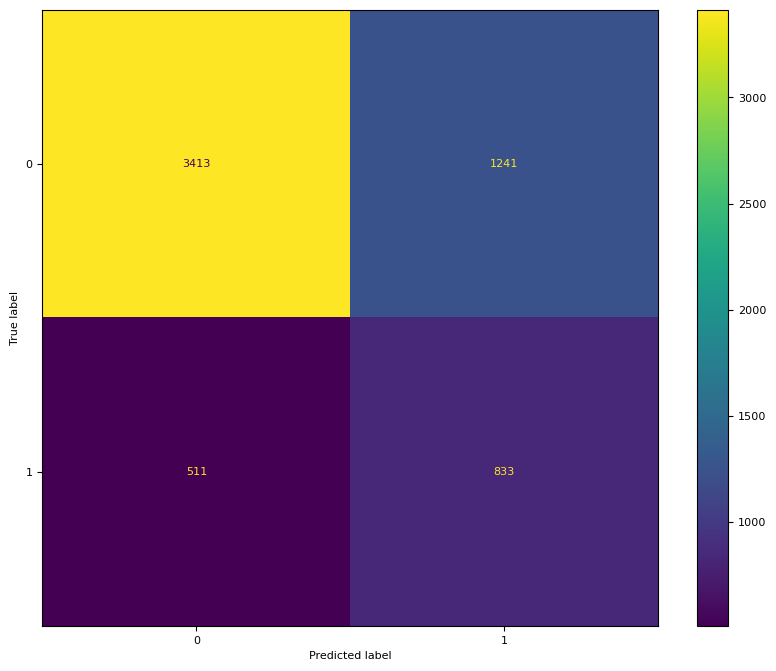

In [ ]:
import optuna

# Fonction objectif pour Optuna
def objectiveLasso(trial):
    # Définir l'espace de recherche des hyperparamètres
    C = trial.suggest_loguniform('C', 1e-5, 1e3)
    max_iter = trial.suggest_int('max_iter', 50, 1500)
    
    # Créer le modèle avec les hyperparamètres choisis
    log_reg = LogisticRegression(C=C, max_iter=max_iter, penalty="l1", solver='liblinear')
    
    # Entraîner le modèle
    log_reg.fit(X_train_up, y_train_up)
    
    # Faire des prédictions
    y_pred = log_reg.predict(X_test)
    
    # Calculer le score F1
    f1 = f1_score(Y_test, y_pred)
    
    return f1

#study = optuna.create_study(direction='maximize')
#study.optimize(objectiveLasso, n_trials=600)

# Afficher les meilleurs hyperparamètres trouvés
#print("Best trial:")
#trial = study.best_trial
##print("  F1-Score: ", trial.value)
#print("  Best hyperparameters: ", trial.params)

# Entraîner et évaluer le modèle avec les meilleurs hyperparamètres
#best_log_reg = LogisticRegression(C=trial.params['C'], max_iter=trial.params['max_iter'], penalty="l1",solver='liblinear')
params = {'C': 0.001570270557232808, 'max_iter': 889}
best_log_reg = LogisticRegression(C=params['C'], max_iter=params['max_iter'], penalty="l1",solver='liblinear')
best_log_reg.fit(X_train_up, y_train_up)
y_pred = best_log_reg.predict(X_test)
print("Classification Report:\n", classification_report(Y_test, y_pred))
c_matrix = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix)
disp.plot()
plt.show()

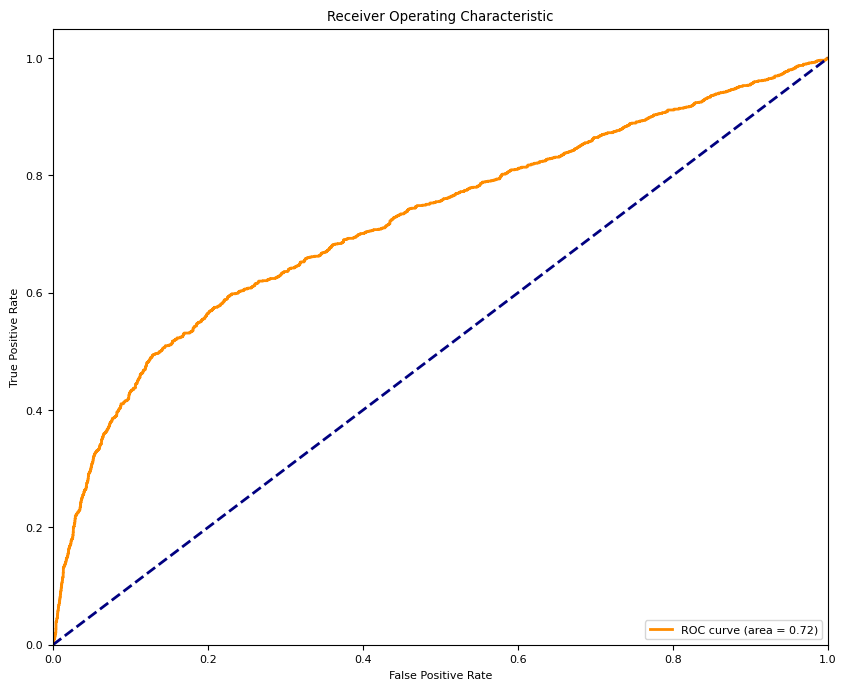

In [ ]:
# Prédictions de probabilité pour la courbe ROC
y_proba = best_log_reg.predict_proba(X_test)[:, 1]

# Calculer les valeurs ROC
fpr, tpr, _ = roc_curve(Y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Modèle 3 : Forêt aléatoire

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

forest = RandomForestClassifier()
forest.fit(X_train_res, Y_train_res)

Y_pred = forest.predict(X_test_scaled)

print("Forêt aléatoire")
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

Forêt aléatoire
Accuracy: 0.8026008669556519
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      4654
           1       0.57      0.47      0.52      1344

    accuracy                           0.80      5998
   macro avg       0.71      0.68      0.70      5998
weighted avg       0.79      0.80      0.80      5998

[[4184  470]
 [ 714  630]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import optuna
from optuna.samplers import TPESampler

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 2, 32)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)

    forest = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
        n_jobs=-1
    )

    forest.fit(X_train_res, Y_train_res)

    Y_pred = forest.predict(X_test_scaled)

    f1 = f1_score(Y_test, Y_pred)

    return f1

#study = optuna.create_study(direction='maximize', sampler=TPESampler(seed=42))
#study.optimize(objective, n_trials=50, n_jobs=-1)

#best_params = study.best_params
#print("Meilleur hyperparamètre: ", best_params)

best_params = {'n_estimators': 905, 'max_depth': 6, 'min_samples_split': 19, 'min_samples_leaf': 1}
forest_final = RandomForestClassifier(
    **best_params,
    random_state=42,
    n_jobs=-1
)
forest_final.fit(X_train_res, Y_train_res)

Y_pred = forest_final.predict(X_test_scaled)

print("Foret aléatoire avec optimisation des hyperparamètres")
print("F1 Score:", f1_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))


Foret aléatoire avec optimisation des hyperparamètres
F1 Score: 0.5608695652173913
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      4654
           1       0.55      0.58      0.56      1344

    accuracy                           0.80      5998
   macro avg       0.71      0.72      0.71      5998
weighted avg       0.80      0.80      0.80      5998

[[4012  642]
 [ 570  774]]


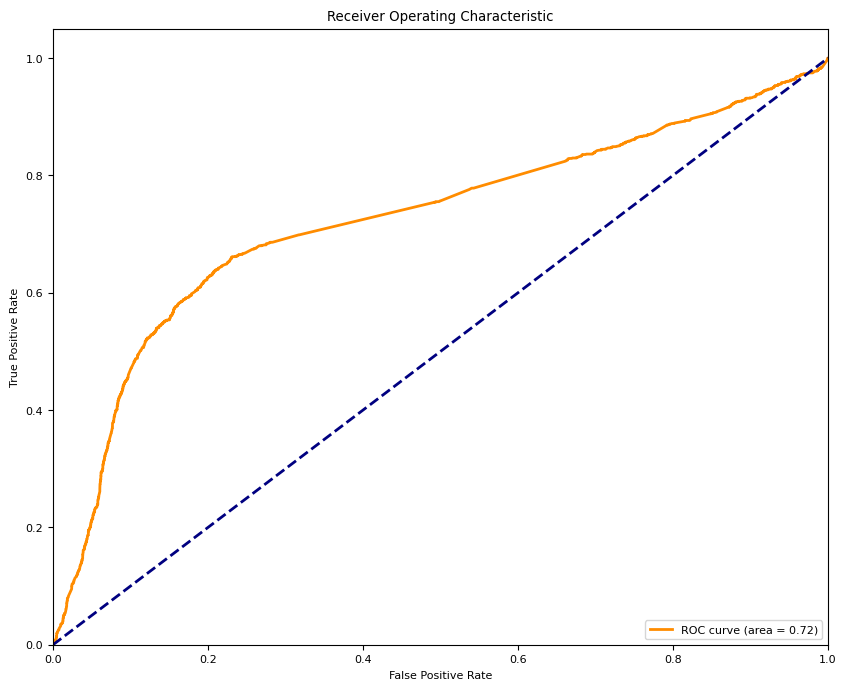

In [ ]:
# Prédictions de probabilité pour la courbe ROC
y_proba2 = forest_final.predict_proba(X_test)[:, 1]

# Calculer les valeurs ROC
fpr2, tpr2, _ = roc_curve(Y_test, y_proba2)
roc_auc2 = auc(fpr2, tpr2)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr2, tpr2, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()